In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mutual_info_score, normalized_mutual_info_score, auc, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from typing import List, Dict
from IPython.display import display
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
import math
import random
import warnings



%matplotlib inline

# Data exploration

Loading the data:

In [136]:
# load
data = pd.read_csv("train.csv")

pd.set_option('display.max_columns',None)

data.head(20)

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.0,0.0,Feb,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,0.0,0.0,Feb,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,0.0,0.0,Feb,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.0,0.4,Feb,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
5,5,0.0,0.0,0.0,0.0 minutes,2.0,NaN,NaN,0.000000,0.100000,0.0,0.8,Feb,2.0,NaN,2.0,Returning_Visitor,False,c_3,104.712405,log200,NaN,0
6,6,0.0,0.0,0.0,0.0 minutes,3.0,738.0 minutes,NaN,0.000000,0.022222,0.0,0.4,Feb,2.0,edge_96.0.1054.72,1.0,Returning_Visitor,False,c_2,89.786568,log404,NaN,0
7,7,0.0,0.0,0.0,0.0 minutes,3.0,395.0 minutes,395.000000,0.000000,0.066667,0.0,0.0,Feb,1.0,safari_15,3.0,Returning_Visitor,False,c_3,101.184534,log_100,NaN,0
8,8,NaN,0.0,0.0,0.0 minutes,16.0,407.75 minutes,NaN,0.018750,0.025833,0.0,0.4,Feb,1.0,safari_15.4,4.0,Returning_Visitor,False,NaN,83.931739,log_100,NaN,0
9,9,0.0,0.0,0.0,0.0 minutes,7.0,280.5 minutes,280.500000,0.000000,0.028571,0.0,0.0,Feb,1.0,safari_15.2,1.0,Returning_Visitor,False,c_3,97.899633,log200,NaN,0


In [137]:
data.shape

(10479, 23)

In [138]:
data.isnull().sum() ## checking null values, would probably get rid of column D as most of the observations have a
## a NaN value in it

id                           0
num_of_admin_pages         605
admin_page_duration        413
num_of_info_pages          687
info_page_duration         317
num_of_product_pages       403
product_page_duration      621
total_duration            4753
BounceRates                 22
ExitRates                   26
PageValues                  27
closeness_to_holiday       496
Month                       25
device                     323
internet_browser           563
Region                      19
user_type                   23
Weekend                     23
A                          706
B                           23
C                           23
D                        10374
purchase                     0
dtype: int64

In [139]:
data.dtypes

id                         int64
num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration        object
num_of_product_pages     float64
product_page_duration     object
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                 object
Weekend                   object
A                         object
B                        float64
C                         object
D                        float64
purchase                   int64
dtype: object

We can see we have limited perspective on the data due to several "object" columns. <br>
We will have a broader perspective when we "clean up" some columns (like taking out "minutes" in durations columns),<br>
we also want to interpret the string columns. After we do this, we would check the correlations and the statistics.

In [140]:
data.describe() 

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
count,10479.00000,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000,10479.000000
mean,5239.00000,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440,0.154690
std,3025.17107,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818,0.361626
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571,0.000000
25%,2619.50000,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657,0.000000
50%,5239.00000,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221,0.000000
75%,7858.50000,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061,0.000000
max,10478.00000,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254,1.000000


In [141]:
data.corr() #Initial correlation impression

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
id,1.000000,0.082526,0.044857,0.066631,0.173407,0.151529,-0.054239,-0.077429,0.053881,-0.225908,0.043127,0.010513,-0.016671,-0.129515,0.124522
num_of_admin_pages,0.082526,1.000000,0.591505,0.383974,0.436619,0.447180,-0.222772,-0.317713,0.102648,-0.099734,-0.010604,-0.007737,-0.016465,-0.197337,0.145048
admin_page_duration,0.044857,0.591505,1.000000,0.297256,0.291797,0.445325,-0.141197,-0.202072,0.068009,-0.072091,-0.011671,-0.003730,-0.018782,-0.110871,0.097504
num_of_info_pages,0.066631,0.383974,0.297256,1.000000,0.382615,0.489927,-0.116471,-0.165944,0.046150,-0.051921,-0.011148,-0.032790,-0.021416,-0.167875,0.095563
num_of_product_pages,0.173407,0.436619,0.291797,0.382615,1.000000,0.877881,-0.202365,-0.292254,0.057020,-0.027799,0.000877,-0.043437,-0.019066,-0.326672,0.157167
total_duration,0.151529,0.447180,0.445325,0.489927,0.877881,1.000000,-0.192154,-0.265104,0.054231,-0.049315,-0.007370,-0.046022,-0.026004,-0.236378,0.145429
BounceRates,-0.054239,-0.222772,-0.141197,-0.116471,-0.202365,-0.192154,1.000000,0.911589,-0.116746,0.081161,0.024877,-0.008510,0.008744,0.147855,-0.150683
ExitRates,-0.077429,-0.317713,-0.202072,-0.165944,-0.292254,-0.265104,0.911589,1.000000,-0.172314,0.111041,0.015076,-0.009308,0.007393,0.231711,-0.207804
PageValues,0.053881,0.102648,0.068009,0.046150,0.057020,0.054231,-0.116746,-0.172314,1.000000,-0.062112,0.019302,0.010091,-0.012400,-0.447703,0.486404
closeness_to_holiday,-0.225908,-0.099734,-0.072091,-0.051921,-0.027799,-0.049315,0.081161,0.111041,-0.062112,1.000000,0.018269,-0.012651,-0.005234,0.171953,-0.083926


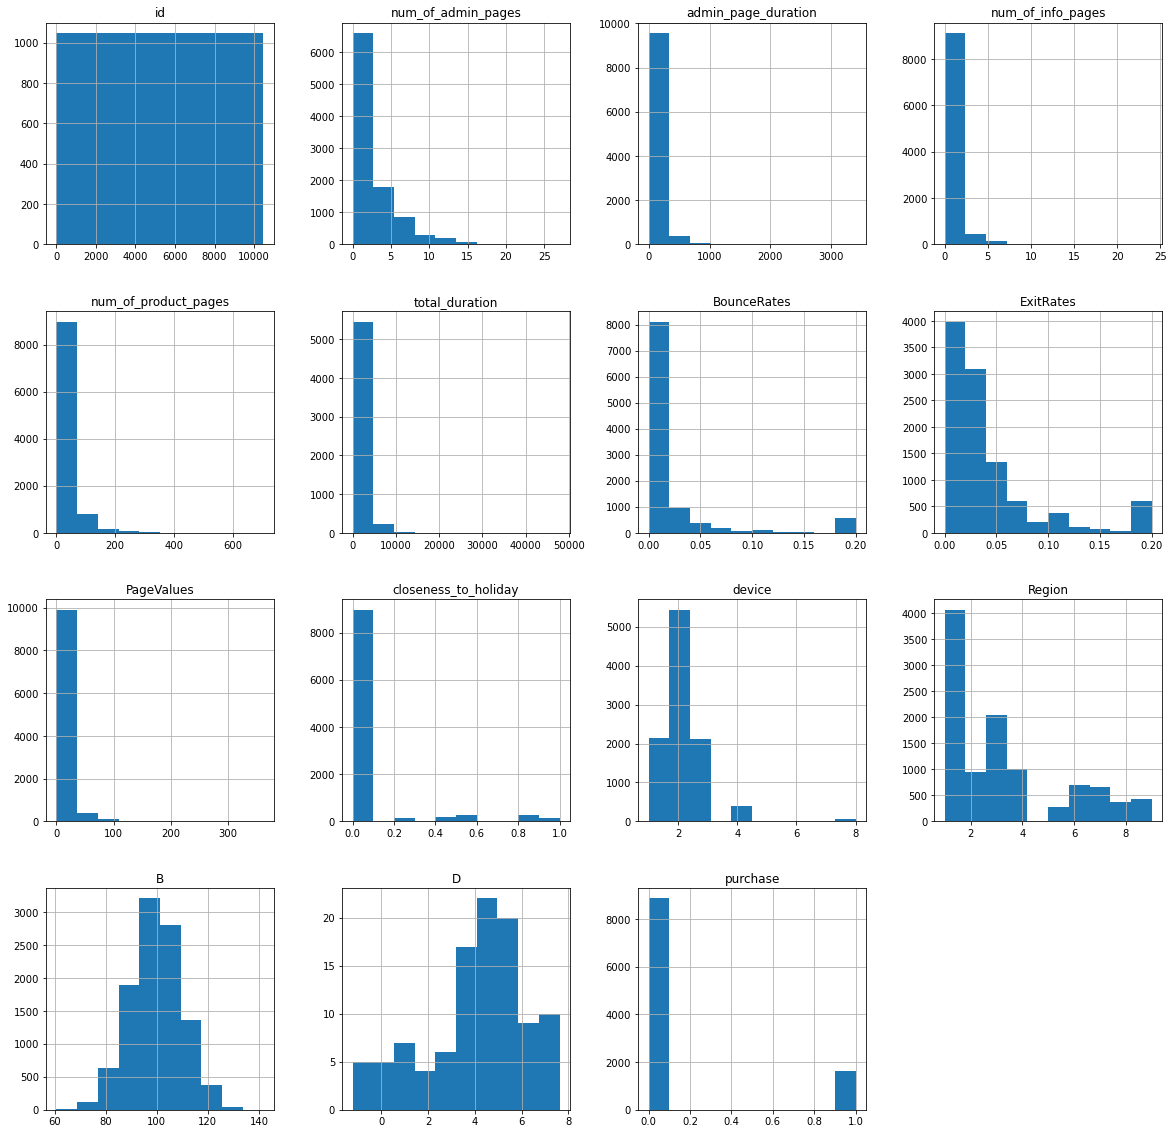

In [142]:
data.hist(figsize=(20,20))  ##initial impression on the data, seems like column B is normally distributed
warnings.filterwarnings("ignore")

# Transform categorical features to numeric
First of all, we will deal with the object columns.<br>
We would like to examine their contribution to our predictability, and transfer them to numeric values if we find them  significant. 

1. **Analyzing the "internet_browser" column:**<br>

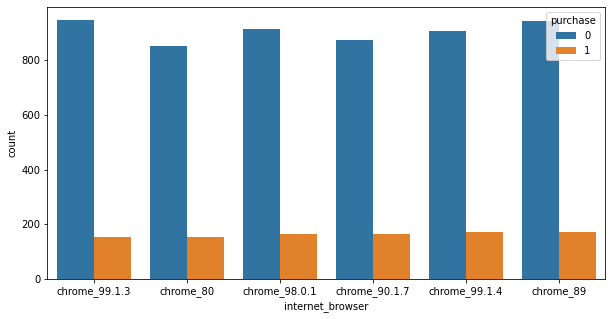

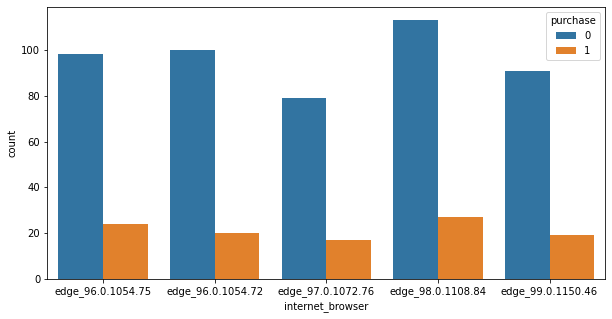

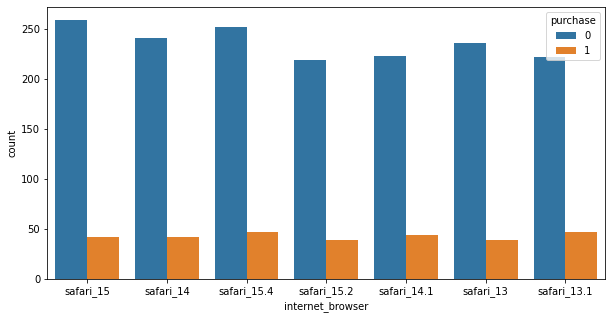

In [143]:
chrome = data["internet_browser"].str.startswith("chrome")
edge = data["internet_browser"].str.startswith("edge")
safari = data["internet_browser"].str.startswith("safari")
browser = data["internet_browser"].str.startswith("browser")
chrome.fillna(False, inplace=True)
edge.fillna(False, inplace=True)
safari.fillna(False, inplace=True)
browser.fillna(False, inplace=True)
plt.figure(figsize=(10,5))
chrome_test = sns.countplot(x="internet_browser", hue="purchase", data=data[chrome]) 
plt.show()
plt.figure(figsize=(10,5))
chrome_test = sns.countplot(x="internet_browser", hue="purchase", data=data[edge]) 
plt.show()
plt.figure(figsize=(10,5))
chrome_test = sns.countplot(x="internet_browser", hue="purchase", data=data[safari]) 
plt.show()


No sub types of the main browswrs gives any advantage in predicting a purchase, so we can merge all sub types.<br>
<br>Browser has many versions, there are 10 main versions and each one has more sub versions, we will check the 10 main ones.<br>
If a version does not have many observations, we will label it as broswer_others. else, we will analyze it.


Browser10 observations - 125 ,will be analyzed:


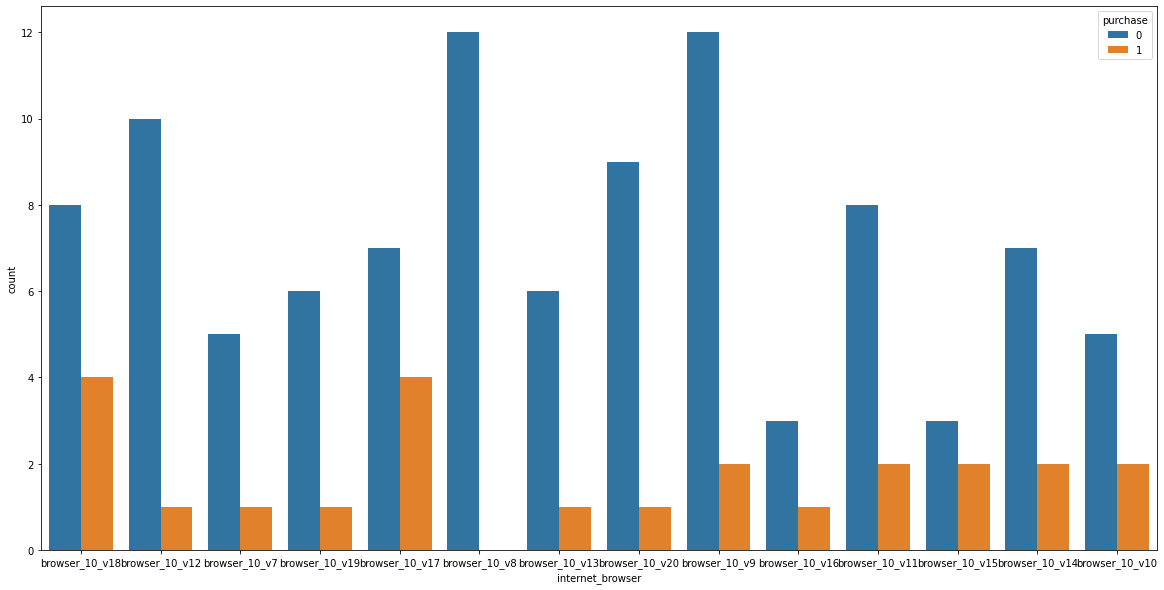

Browser11 observations - 5 ,should probably add it to "browser_others" section
Browser12 observations - 9 ,should probably add it to "browser_others" section
Browser13 observations - 47 ,should probably add it to "browser_others" section
Browser_3 observations - 87 ,should probably add it to "browser_others" section
Browser_5 observations - 386 ,will be analyzed:


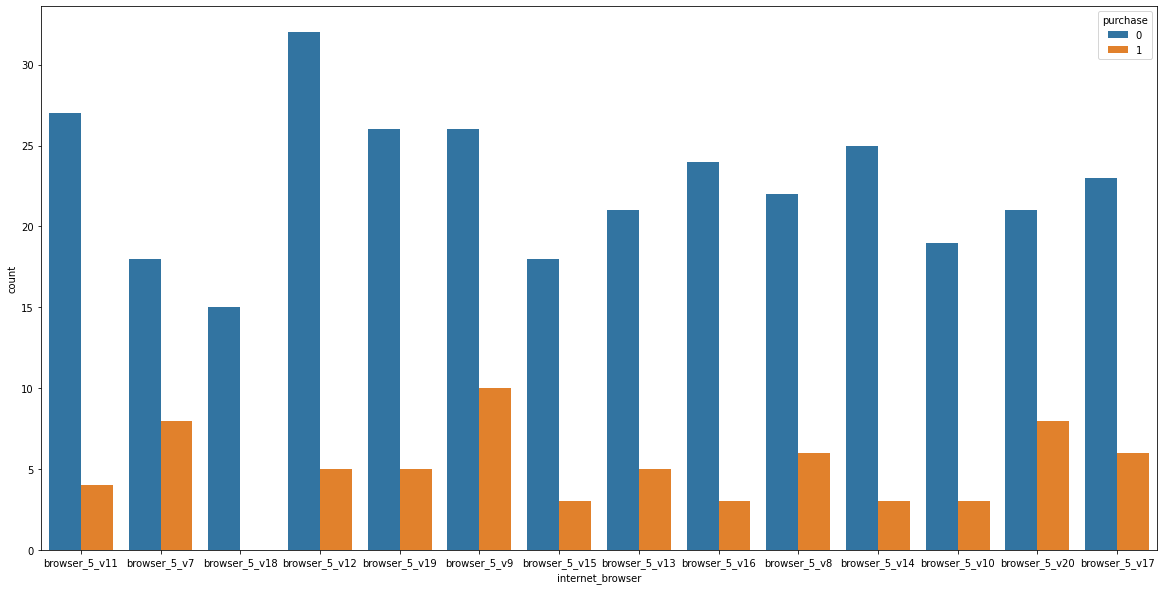

Browser_6 observations - 142 ,will be analyzed:


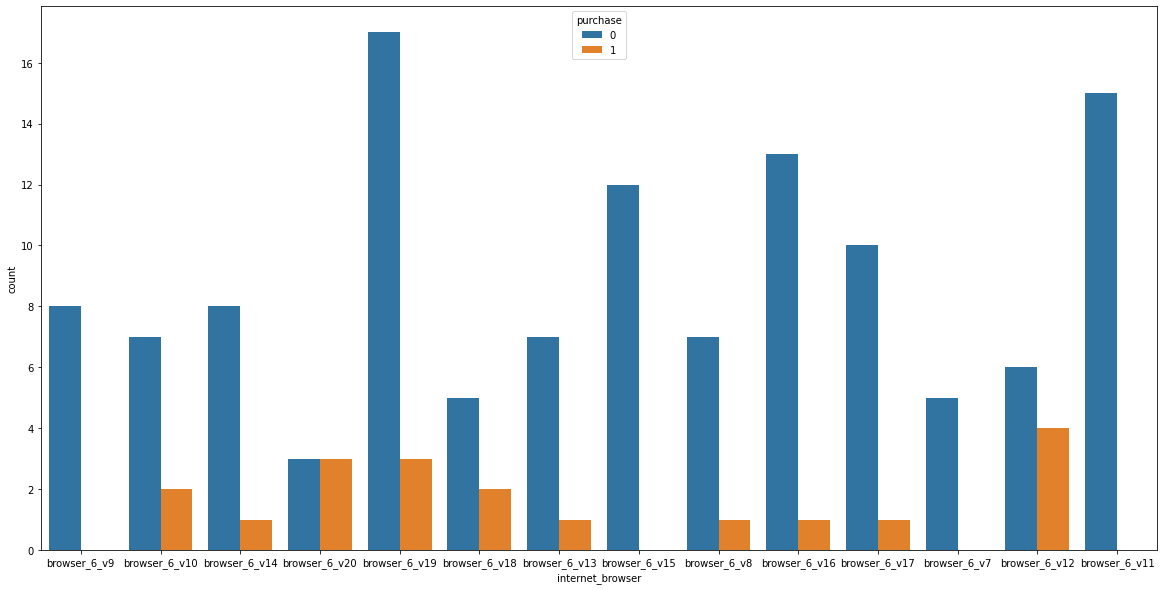

Browser_7 observations - 36 ,should probably add it to "browser_others" section
Browser_8 observations - 119 ,will be analyzed:


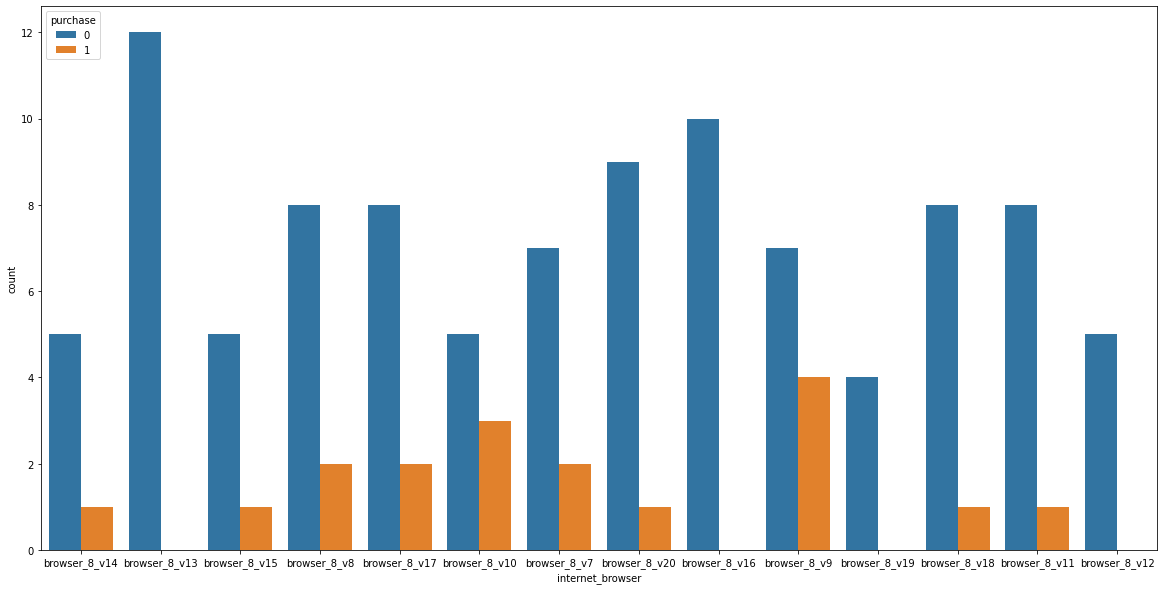

Browser_9 observations - 1 ,should probably add it to "browser_others" section


In [144]:
browser10 = data["internet_browser"].str.startswith("browser_10")
browser10.fillna(False, inplace=True)
print("Browser10 observations -", browser10.sum(),',will be analyzed:') # 125 observations
plt.figure(figsize=(20,10)) 
broswer_10_plot = sns.countplot(x="internet_browser", hue="purchase", data=data[browser10])  
plt.show()
# each sub version consists of few observations (so not much info can be lost if we get rid of them), 
# also it seems like there are no drastic changes in between sub categories, so we will get rid of the sub 10 versions

browser11 = data["internet_browser"].str.startswith("browser_11")
browser11.fillna(False, inplace=True)
print("Browser11 observations -",browser11.sum(),',should probably add it to "browser_others" section') # 5 observations, should probably add it to "browser_others" section

browser12 = data["internet_browser"].str.startswith("browser_12")
browser12.fillna(False, inplace=True)
print("Browser12 observations -",browser12.sum(),',should probably add it to "browser_others" section') # 9 observations, should probably add it to "browser_others" section

browser13 = data["internet_browser"].str.startswith("browser_13")
browser13.fillna(False, inplace=True)
print("Browser13 observations -",browser13.sum(), ',should probably add it to "browser_others" section') # 47 observations, should probably add it to "browser_others" section

browser3 = data["internet_browser"].str.startswith("browser_3")
browser3.fillna(False, inplace=True)
print("Browser_3 observations -",browser3.sum(),',should probably add it to "browser_others" section') # 87 observations, should probably add it to "browser_others" section

browser5 = data["internet_browser"].str.startswith("browser_5")
browser5.fillna(False, inplace=True)
print("Browser_5 observations -",browser5.sum(),',will be analyzed:') # 386 observations
plt.figure(figsize=(20,10)) 
broswer_5_plot = sns.countplot(x="internet_browser", hue="purchase", data=data[browser5])  
plt.show()
# many sub versions, no drastic diff, so we can label all the sub versions as browser5

browser6 = data["internet_browser"].str.startswith("browser_6")
browser6.fillna(False, inplace=True)
print("Browser_6 observations -",browser6.sum(),',will be analyzed:') # 142 observations
plt.figure(figsize=(20,10)) 
broswer_6_plot = sns.countplot(x="internet_browser", hue="purchase", data=data[browser6])  
plt.show()
# many sub versions so not many observations in each category, so we will label all of them broswer6

browser7 = data["internet_browser"].str.startswith("browser_7")
browser7.fillna(False, inplace=True)
print("Browser_7 observations -",browser7.sum(), ',should probably add it to "browser_others" section') # 36 observations, should probably add it to "browser_others" section

browser8 = data["internet_browser"].str.startswith("browser_8")
browser8.fillna(False, inplace=True)
print("Browser_8 observations -",browser8.sum(),',will be analyzed:') # 119 observations
plt.figure(figsize=(20,10)) 
broswer_8_plot = sns.countplot(x="internet_browser", hue="purchase", data=data[browser8])  
plt.show()
# many sub versions so not many observations in each category, so we will label all of them broswer8

browser9 = data["internet_browser"].str.startswith("browser_9")
browser9.fillna(False, inplace=True)
print("Browser_9 observations -",browser9.sum(),',should probably add it to "browser_others" section') # 1 observation, should probably add it to "browser_others" section

# now we can transform all browser values while knowing we did not lose much information
# transform to browser10/browser5/browser6/browser8/browser_other


Now we will make the appropriate changes to the data:

browser_5        386
browser_other    185
browser_6        142
browser_10       125
browser_8        119
Name: internet_browser, dtype: int64


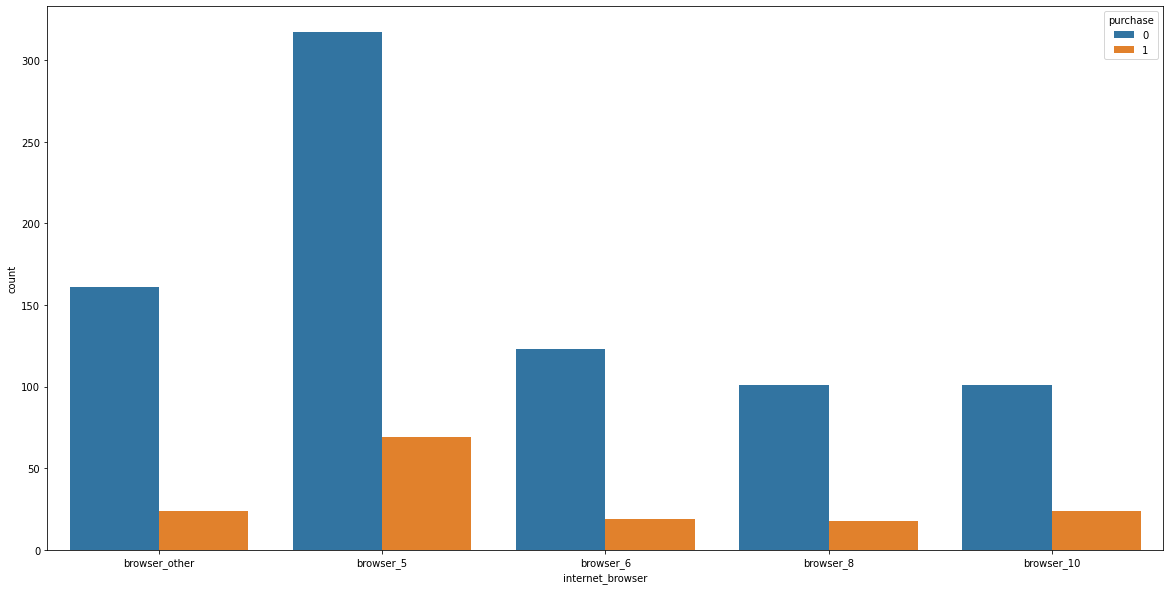

In [145]:
data.loc[browser10,"internet_browser"] = "browser_10"
data.loc[browser5,"internet_browser"] = "browser_5"
data.loc[browser6,"internet_browser"] = "browser_6"
data.loc[browser8,"internet_browser"] = "browser_8"

data.loc[browser11 | browser12 | browser13 | browser3 | browser7 | browser9 ,"internet_browser"] = "browser_other"

print(data[browser]["internet_browser"].value_counts())

plt.figure(figsize=(20,10)) 
broswer_plot = sns.countplot(x="internet_browser", hue="purchase", data=data[browser])  
plt.show()

We can clearly see that most browsers are roughly the same, regarding predicting a purchase.<br>
We are unsure about browser_5 so we will check the percentage of purchases using browser_5 compared to another browser

In [146]:
percentage_purchase5 = (browser5 & (data["purchase"] == 1)).sum() / browser5.sum()
print("browser_5 percentage:",percentage_purchase5)

percentage_purchase6 =(browser6 & (data["purchase"] == 1)).sum() / browser6.sum()
print("browser_5 percentage:",percentage_purchase6)

browser_5 percentage: 0.17875647668393782
browser_5 percentage: 0.13380281690140844


We can now conclude that all browsers are roughly the same, so we will change all browsers values to a general browser value without losing important information.<br>
We will also finally change the chrome/edge/safari values to a general value.

chrome     6419
safari     1952
browser     957
edge        588
Name: internet_browser, dtype: int64


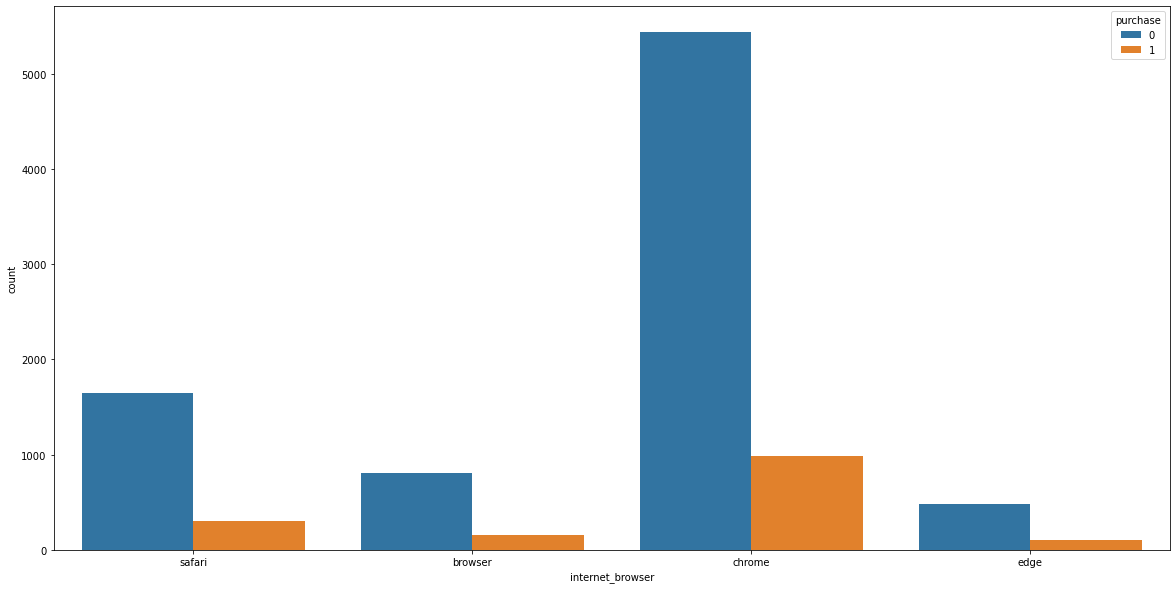

In [147]:
data.loc[browser,"internet_browser"] = "browser"
data.loc[chrome,"internet_browser"] = "chrome"
data.loc[safari,"internet_browser"] = "safari"
data.loc[edge,"internet_browser"] = "edge"


print(data["internet_browser"].value_counts())
plt.figure(figsize=(20,10)) 
internet_browser_plot = sns.countplot(x="internet_browser", hue="purchase", data=data) 
plt.show()

We are not sure about whether the internet_browser has any value based on pure numbers, so we plot the purchase percentage for each browser:

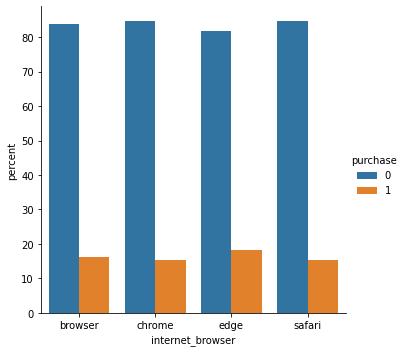

In [148]:
x,y = 'internet_browser', 'purchase'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))


# we conclude that this feature is meaningless and does not gives us any important information, we can remove it



 <span style="color:yellow">we conclude that this feature is meaningless and does not gives us any important information, we can remove it.</span>

2. **Analyzing column "C":**<br>
We understood that column C values are http logging notifications. <br>
according to that we want to check if there is any significant differences between the users that received different logging notifications.

log200     1813
log400     1760
log404     1754
log8080    1748
log_100    1731
log202     1650
Name: C, dtype: int64


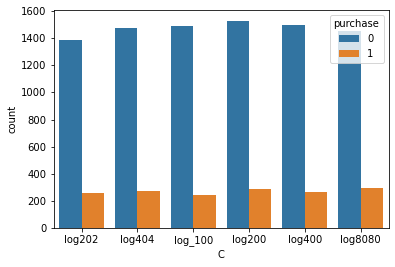

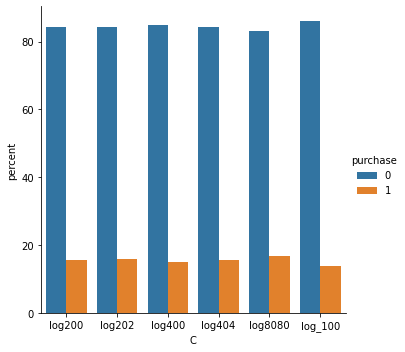

In [149]:
print(data['C'].value_counts()) # We can see that there are 6 log values, the data is rougly evenly distributed

log_plot = sns.countplot(x="C", hue="purchase", data=data) 

x,y = 'C', 'purchase'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

 # we can see that no log value is any different than the others in terms of predicting a purchase, so we can drop this column
 # without losing precious information 



  <span style="color:yellow">As we can see in the graph above, all the log values give the same probability in regards to a purchase, that means the variance of log values does not influence the label, we can drop it.</span>

2. **Analyzing column "A":**

column "A" different values:  (96,)
c_2        3101
c_1        1944
c_3        1644
c_4         850
c_13        586
c_10        347
c_6         335
c_8         268
c_5         205
c_11        199
c_7          34
c_9          32
c_15         31
c_19         14
c_14         10
c_18          7
c_20_94       5
c_20_97       5
c_20_14       5
c_20_36       4
Name: A, dtype: int64


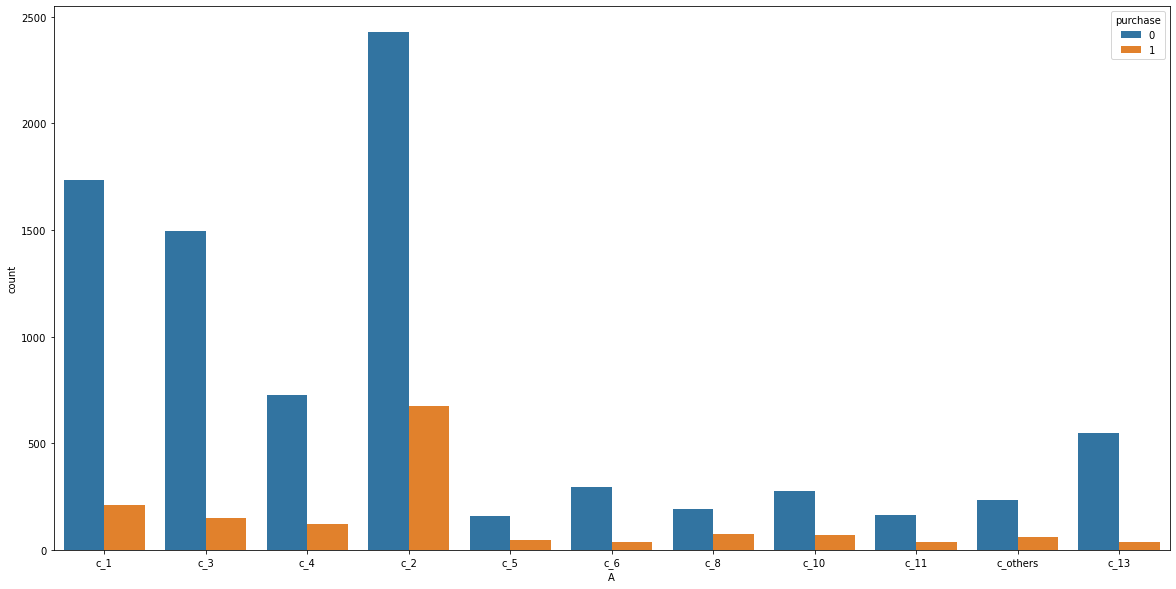

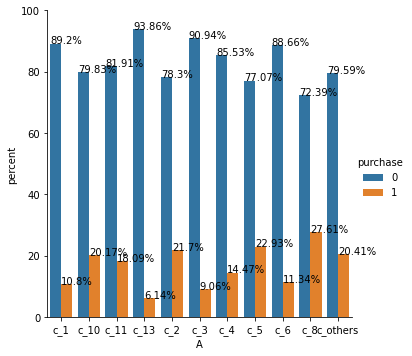

In [150]:
print( 'column "A" different values: ', data['A'].value_counts().shape) # 96 diff string values in A column

print(data['A'].value_counts().head(20))

# there are many string values on this column, it seems like many values are not very common 
# after the top 10 most common values, there is a sharp drop in numbers for each value, we will group them as "c_others"

sorted_A_values = data['A'].value_counts().index.tolist()
A_others_values = sorted_A_values[10:]

data_copy = data.copy()

data_copy.loc[data["A"].isin(A_others_values),'A'] = "c_others"

plt.figure(figsize=(20,10))
data_A_plot = sns.countplot(x="A", hue="purchase", data=data_copy)   # show pure numbers
plt.show()

#  now we will show percentage of purchase for every value

x,y = 'A', 'purchase'

percentage_plot_data_A = data_copy.groupby(x)[y].value_counts(normalize=True)
percentage_plot_data_A = percentage_plot_data_A.mul(100)
percentage_plot_data_A = percentage_plot_data_A.rename('percent').reset_index()

percentage_plot_A = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=percentage_plot_data_A)
percentage_plot_A.ax.set_ylim(0,100)

for p in percentage_plot_A.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    percentage_plot_A.ax.text(txt_x,txt_y,txt)

# we will group similar values into a single category, in order to reduce the number of features we will need using 
# OneHotEncoding (we want to avoid the curse of dimensionality)




<span style="color:yellow">analyzing the results:</span>

c_2 (3101), c_1 (1944) and c_3 (1644) are the most dominant categories by far, so we would want to lose minimal information about them.

c_2 (21.7%) has distinguished purchase percentage compared to c_1 (10.8%) and c_3 (9.06%).

after looking at the other categories, we noticed that most categories have similar information compared to either c_2 or c_1/c_3, so we could use it for grouping.

The only category with considerable observations with different behaviour is c_4 (850,14.47%).

We considered grouping the data to three values: c_2, c_1 (because it is more dominant then c_3) and c_4, but after
giving it some thought, we realized no other categories should be labeled as c_4 (it would make more sense to label them as c_2 or c_1), so the c_4 grouping would include only c_4 itself.

If we could avoid the c_4 grouping, we could avoid using dummy variables altogether and protect ourselves from the curse of dimensionality, we could make the A column into a binary column based on 2 groupings.
Taking all of that into consideration, we decided to use the following grouping:

1) c_2 grouping - includes c_2 (3101, 21.7%), c_10 (347, 20.17%), c_others(294, 20.41%), c_8 (268, 27.61%),
   c_5 (205, 22.93%), c_11 (199, 18.09%).

* c_5 gives slightly higher percentage than c_2, c_11 gives slightly lower percentage than c_2, so intuitively, it cancels out.

* c_10 and c_others gives a lower percentage (than c_2), and c_8 gives a higher percentage, while it does not cancel out (because c_8 is more dominant) we thought that considering the low number of observations, there won't be a high price to pay, information-wise.

2) c_1 grouping - includes c_1 (1944,10.8%), c_3(1644,9.06%), c_4(850,14.47%), c_13(586, 6.14%), c_6(335, 11.34%).
 
* c_4 and c_13 roughly cancel out. c_13 pulls harder (4.6% lower than c_1) but has less observations, while c_4 pulls less (3.6% higher) but has more obvervations.

* c_3 and c_6 don't exactly cancel out, but we thought it is negligible.

c_2 grouping - numeric value 1

c_1 grouping - numeric value 0

In [151]:
c_2_grouping = ['c_2', 'c_10','c_others','c_8','c_5','c_11']
c_1_grouping = ['c_1', 'c_3', 'c_4', 'c_13', 'c_6']

**implementation interlude** <br>
We would make the following changes:

1.  Column C - remove
2.  Column internet_browser - remove
3.  Column A - transform into binary
4.  Column Weekend - transform boolean into numeric

In [152]:
data_copy_2 = data_copy.drop(columns = ['C', 'internet_browser'],inplace=False)

data_copy_2.loc[data_copy_2['A'].isin(c_2_grouping),'A'] = 1
data_copy_2.loc[data_copy_2['A'].isin(c_1_grouping),'A'] = 0
data_copy_2['A'] = data_copy_2['A'].astype(float)

data_copy_2['Weekend'] = data_copy_2['Weekend'].replace({True:1,False:0})


2. **Analyzing column "user_type":**

purchase precentage in 'Returning_Visitor' category:  13.811969629298796%
purchase precentage in 'New_Visitor' category:  25.770308123249297%
purchase precentage in 'Other' category:  18.055555555555554%

user type column values count:
Returning_Visitor    8956
New_Visitor          1428
Other                  72
Name: user_type, dtype: int64


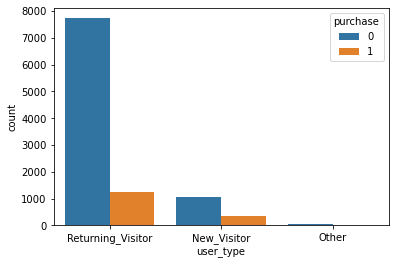

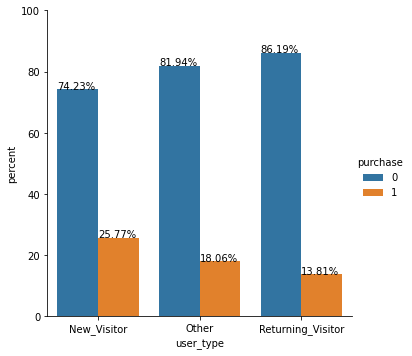

In [153]:
data_copy_3 = data_copy_2.copy()
data_copy_3['user_type'].value_counts()
user_type_plot = sns.countplot(x="user_type", hue="purchase", data=data) 

x,y = 'user_type', 'purchase'

percentage_returning = ( (data["user_type"] == "Returning_Visitor") & (data["purchase"] == 1) ).sum() / (data["user_type"] == "Returning_Visitor").sum()
print("purchase precentage in 'Returning_Visitor' category: ", str(percentage_returning*100)+"%")

percentage_new = ( (data["user_type"] == "New_Visitor") & (data["purchase"] == 1) ).sum() / (data["user_type"] == "New_Visitor").sum()
print("purchase precentage in 'New_Visitor' category: ",str(percentage_new*100)+"%")

percentage_other = ( (data["user_type"] == "Other") & (data["purchase"] == 1) ).sum() / (data["user_type"] == "Other").sum()
print("purchase precentage in 'Other' category: ",str(percentage_other*100)+"%")

print("\nuser type column values count:")
print(data['user_type'].value_counts())


percentage_plot_user_type = data_copy_3.groupby(x)[y].value_counts(normalize=True)
percentage_plot_user_type = percentage_plot_user_type.mul(100)
percentage_plot_user_type = percentage_plot_user_type.rename('percent').reset_index()

percentage_plot_user_type = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=percentage_plot_user_type)
percentage_plot_user_type.ax.set_ylim(0,100)

for p in percentage_plot_user_type.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    percentage_plot_user_type.ax.text(txt_x,txt_y,txt)

<span style="color:yellow">Analyzing the results:</span><br>
From the values count we can see that we only have 72 observations in which the user type is "other".
If we could get rid of the "other" category, we could avoid using dummy variables for this feature, make it a binary column, and reduce Dimensions (it would be a waste to transform it into 3 OneHotEncoder columns because of an insignificant value with 72 observations).

Our goal here is to get rid of the negligible value "other" and manage to keep most of its information by diving the observations between the "New_Visitor" and "Returning_Visitor" categories.

According to the proportions we can see above, we decided to convert 65% from the "Other" values to "Returning_Visitor" and 35% to "New_Visitor".

Logic:

 If we want "Other"-labeled observations to maintain a purchase for 18% of the time, we can give 0.65 of them the "Returning_Visitor" value and 0.35 of them the "New_Visitor" value (0.65 * 13.8 + 0.35 * 25.77 ≈ 0.18)

 * On the project deadline date, we realized that perhaps just converting "Other" category to "Returning_visitor" was a better approach to the issue - as returning was a category far more common and with similar purchase percentage, so the convertion would not have much effect on "Returning_Visitor" category at all. We decided not to change the implementation because dealing ideally with the "other" category has extremely minimal influence on our conclusions and our models' performances - it makes sense because this category consists of very few observations, and it does not differ significantly from other categories in terms of predicting a purchase. Furthermore, we did not want to change our project code on deadline day.

In [154]:
def other_get_rid(data):
    indexes = np.array(data["id"][data["user_type"]=="Other"])
    indexes = indexes.tolist()
    to_returning = round(0.65*len(indexes))
    to_new = len(indexes)-to_returning
    to_returning_list=[]
    random.seed(0)
    while len(to_returning_list)!=to_returning:
        r=random.choice(indexes)
        indexes.remove(r)
        to_returning_list.append(r)
    for i in to_returning_list:
        data.loc[i,"user_type"] = "Returning_Visitor"
    data['user_type'] = data['user_type'].replace({"Other":"New_Visitor"})
    data['user_type'].value_counts()
    return data

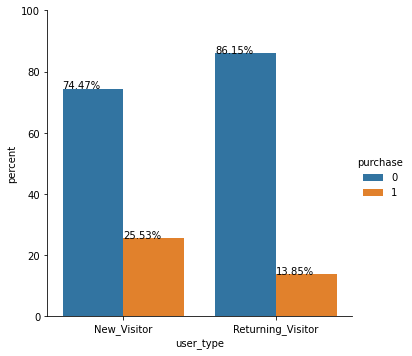

In [155]:
data_copy_3 = other_get_rid(data_copy_3)

# plotting the new graph:
x,y = 'user_type', 'purchase'

percentage_plot_user_type = data_copy_3.groupby(x)[y].value_counts(normalize=True)
percentage_plot_user_type = percentage_plot_user_type.mul(100)
percentage_plot_user_type = percentage_plot_user_type.rename('percent').reset_index()

percentage_plot_user_type = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=percentage_plot_user_type)
percentage_plot_user_type.ax.set_ylim(0,100)

for p in percentage_plot_user_type.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    percentage_plot_user_type.ax.text(txt_x,txt_y,txt)


As we can see in the graph above, we now only have two categories and the percentages in those categories have barely changed (because of the low count of observations in "others").

Now we can transform it to a binary column ("New_Visitor" -> 1 , "Returning_Visitor" -> 0) :

In [156]:
data_copy_3['user_type'] = data_copy_3['user_type'].replace({"New_Visitor":1,"Returning_Visitor":0})
print('"user_type" column values after transforming to boolian:')
data_copy_3['user_type'].value_counts()

"user_type" column values after transforming to boolian:


0.0    9003
1.0    1453
Name: user_type, dtype: int64

**Month column:**

First, we wanted to see the differences in the purchase percentages between the months.
In the first graph we can see the raw differences, in the second graph it is presented in percentages:

purchase precentage in empty cells:  13.811969629298796%


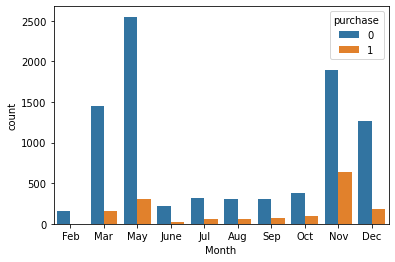

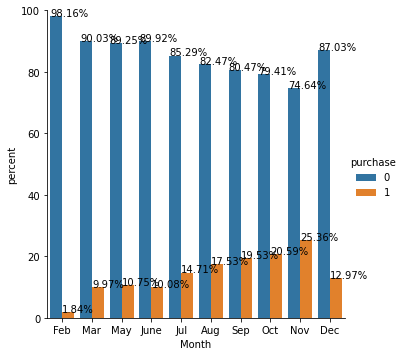

In [157]:
# plotting the months-purchase percentage graph:
x,y = 'Month', 'purchase'

percentage_plot_month = data_copy_3.groupby(x)[y].value_counts(normalize=True)
percentage_plot_month = percentage_plot_month.mul(100)
percentage_plot_month = percentage_plot_month.rename('percent').reset_index()

Months = ['Jan','Feb', 'Mar','Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Months_we_have = []
for month in Months:
    if month in np.array(data_copy_3["Month"]):
        Months_we_have.append(month)
        
sns.countplot(x=x, hue=y, data=data, order=Months_we_have)
percentage_plot_month = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=percentage_plot_month,order=Months_we_have)
percentage_plot_month.ax.set_ylim(0,100)

for p in percentage_plot_month.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    percentage_plot_month.ax.text(txt_x,txt_y,txt)

null_percentage = ( (data["Month"].isnull()) & (data["purchase"] == 1) ).sum() / (data["Month"].isnull()).sum()
print("purchase precentage in empty cells: ", str(percentage_returning*100)+"%")


<span style="color:yellow">analyzing the results:</span><br>
1. We have no data on January and April
2. We do have different purchase percentages in different months as we can see in the graphs below, which means we don't want to group the values in order to keep as much information as we can. 
3. Looks like there is a positive correlation between the month and the purchase, the deeper we are in the year, there seems to be more purchases (excluding Dec)
4. It is a unique feature because months are cyclic and have oridnal meaning, it is not simply categorical.
that is why we had to find a numerical solution that will take this in consideration.

The issue in converting the months into regular ascending numerical values is that the model would consider the difference between December(12) and February(2) as a 10 months gap whereas they are only 2 months apart.
We decided to use a known solution, using functions with cyclical behavior - cosine and sine.

First We will run the cosine function after normalizing the months basic numerical values between 0 to 2π, which corresponds to one cosine cycle.
After this change, Two different times would still get the same value. 
The best way to solve this new problem would be to add another cyclical information to distinguish two times with identical cosine values - We did that by adding an extra column which we created the same way as we did with the cosine function, but this time with the sine function instead. 
We could think of it as a two-axis coordinates system.


In [158]:
def months_sin_and_cos_transform(data):

        Months = ['Jan','Feb', 'Mar','Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        Months_we_have = []
        for month in Months:
                if month in np.array(data["Month"]):
                        Months_we_have.append(month)

        Months_we_have_val = []
        for month in Months_we_have:
                Months_we_have_val.append(Months.index(month)+1)

        # We transfer the strings to numeric, so we can use the sine/cosine functions
        data_month_num_norm = data["Month"].copy()
        for i in range(len(Months_we_have)):
                data_month_num_norm[data_month_num_norm == Months_we_have[i]] = Months_we_have_val[i]

        # We normalize the values to match with the 0-2π cycle
        data_month_num_norm = (2 * math.pi * data_month_num_norm / data_month_num_norm.max()).astype(float)
        # apply cos and sin functions on the data:
        data_month_num_norm_cos = data_month_num_norm.copy()
        data_month_num_norm_cos = np.cos(data_month_num_norm_cos)
        data_month_num_norm_sin = data_month_num_norm.copy()
        data_month_num_norm_sin = np.sin(data_month_num_norm_sin)
        data["Month_cos"] = data_month_num_norm_cos
        data["Month_sin"] = data_month_num_norm_sin
        data["Month_norm"] = data_month_num_norm

        return data



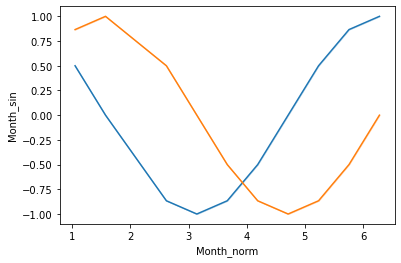

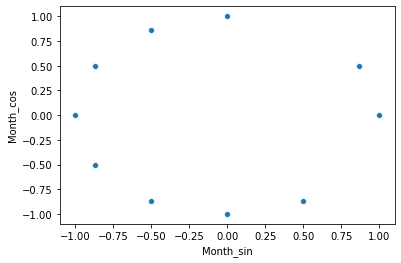

In [159]:
data_copy_3 = months_sin_and_cos_transform(data_copy_3)

sns.lineplot(x="Month_norm", y="Month_cos", data=data_copy_3) # ≈ cos func
sns.lineplot(x="Month_norm", y="Month_sin", data=data_copy_3) # ≈ sin func
plt.show()
sns.scatterplot(data=data_copy_3, x="Month_sin", y="Month_cos") #show months circle representation

data_copy_3.drop(columns = ['Month','Month_norm'],inplace=True)

# D and id columns:

In [160]:
# calculate amount of null values in D column:
null_values_num = data_copy_3["D"].isnull().sum()
rows_num = data_copy_3.shape[0]
values_num = rows_num-null_values_num
print("Number of values in column 'D': ", values_num)
print("Number of NaN values in column 'D': ", null_values_num)
data_copy_3[["purchase", "D", "PageValues"]].corr()


Number of values in column 'D':  105
Number of NaN values in column 'D':  10374


,purchase,D,PageValues
purchase,1.000000,-0.753238,0.486404
D,-0.753238,1.000000,-0.447703
PageValues,0.486404,-0.447703,1.000000


**"D" feature:**<br>
From a look at the correlation table, we saw that feature "D" have a fair reverse correlation with the feature "page value" and high correlation with our lable "purchase" (as presented above).

Despite the correlation with the label, we decided to drop column "D" due to it massive amount of missing values.<br>
we have only 105 numerical values versus 10374 missing values, so the correlation with the label is limited and cannot really be infered. <br>
the PageValues correlation tells us that "D" column info will not be completely lost because "PageValues" carry part of the information, "D" is not independent of the other features.

**"id" feature:**<br>
The "id" featur gives a number to each session in ascending order according to its row number in the table.<br>
It gives us no additional information that can help us to predict the client behavior,<br>
thus we can drop this column without losing precious information (make into index)

In [161]:
#dropping D and id features from data:
data_copy_3.drop("D", inplace=True, axis=1)
data_copy_3.set_index('id')
data_copy_3.drop("id", inplace=True, axis=1)

Tidying the data:

In [162]:
# moving 'purchase' column to the end
def label_to_end(data, label_col_name):
    ordered_col = [x for x in data_copy_3.columns if x not in['purchase']] + ['purchase'] # ordering the cols
    return data_copy_3[ordered_col]


We noticed that all the durations are calculated in minutes, because all the numbers always sum up to "total duration" column<br>
product_page_duration and info_page_duration have "minutes" in them, meaning that is the measure for all columns

In [163]:
data_copy_3 = data_copy_3.rename(columns={"info_page_duration":"info_page_duration_minutes","admin_page_duration":"admin_page_duration_minutes",
"product_page_duration":"product_page_duration_minutes", "total_duration":"total_duration_minutes"})

In [164]:
# now we will take out the string "minutes" from the values so we can interpret it
def to_float(data,col_name):
    data[col_name] = data[col_name].str.replace('minutes', '').astype(float)
    return data

In [165]:
# apply functions on data:
data_copy_3 = label_to_end(data_copy_3, 'purchase')
data_copy_3 = to_float(data_copy_3,'info_page_duration_minutes')
data_copy_3 = to_float(data_copy_3,'product_page_duration_minutes')

## Now we have full access to our data, everything is numeric!

In the heat map below, we can see all the liniar correlations between our featues, while light color represent high correlation and dark color represent low correlation. 

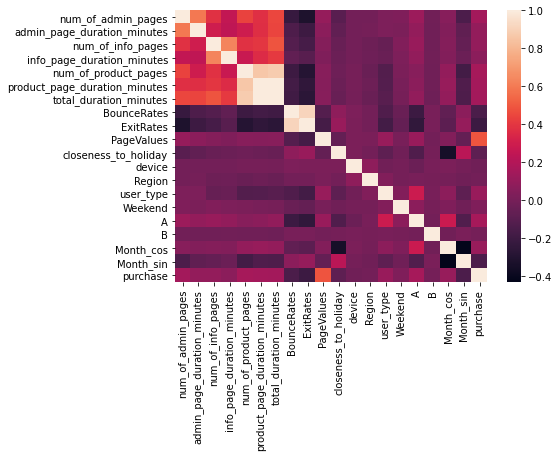

In [166]:
plt.figure(figsize=(7, 5))
sns.heatmap(data_copy_3.corr())

<span style="color:yellow">analyzing heat map:</span><br>
* We can see that num/durations of page correlate highly, it could be helpful later on. <br>
* total_duration is just a sum of the other durations so it does not give out any new data (it is a linear combination of those features). We will get rid of it after we use it to fill other features NaN values




## Removing observations with many Nan values:
We decided we would drop observations with more than 50% Nan values, we have 20 features so 10 was the threshold.

In [167]:
def del_rows_with_many_nans(data):
    remove_NaN_rows_list = data_copy_3.isna().sum(axis=1).sort_values(ascending=False).head(15).index.tolist()
    data.drop(index = remove_NaN_rows_list, inplace=True)
    return data

In [168]:
print(data_copy_3.isna().sum(axis=1).sort_values(ascending=False).head(20)) # top 15 should be removed
data_copy_3 = del_rows_with_many_nans(data_copy_3)


8770     12
8375     11
5003     11
10054    11
6691     11
6109     11
5912     11
1017     10
8850     10
8029     10
10072    10
5917     10
7126     10
7572     10
3009     10
2596      9
10421     9
3074      9
7130      9
1136      9
dtype: int64


# Dealing with Outliers

we decided to deal with outliers before filling NAN values, the reason is we did not want to fill NAN values based on noisy data (that includes outliers), we thought it would be better to predict our NAN values based on "cleaner" data. <br>

Another reason was not wanting to detect outliers later on when we already assumed values we do not have and could impact the decisions.

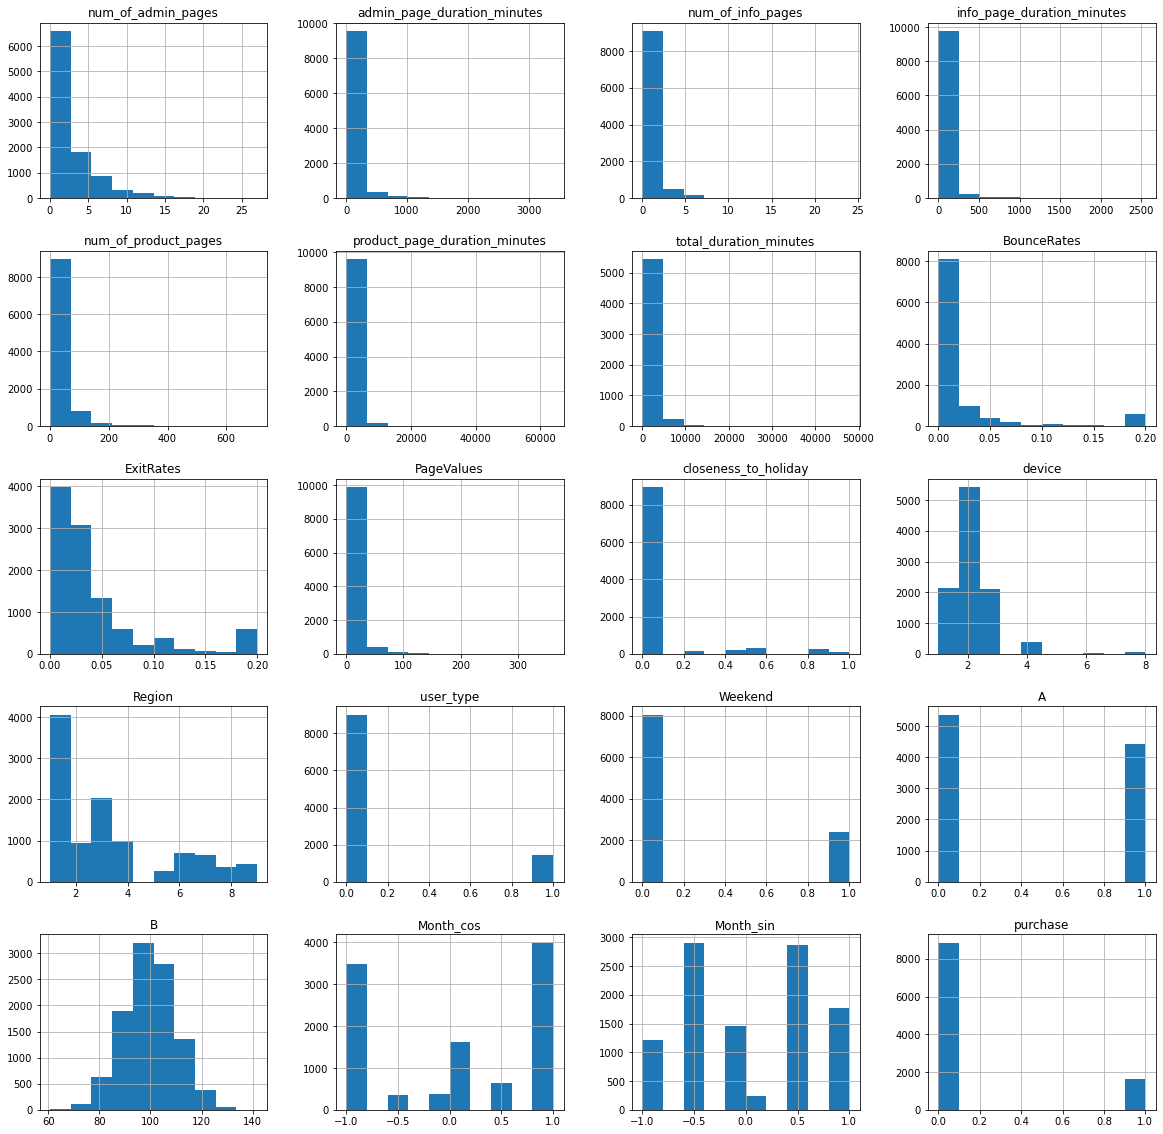

In [169]:
#### to erase and present only the distrebutions we want to work on ####
data_copy_3.hist(figsize=(20,20))
warnings.filterwarnings("ignore")

1. seems like B is normally distributed, let's check it formally in a hypothesis test!

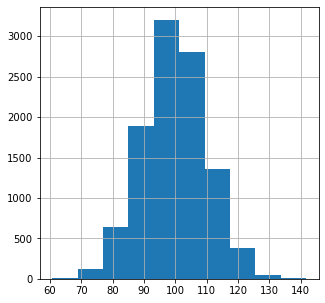

In [170]:
data_copy_3["B"].hist(figsize=(5,5))
warnings.filterwarnings("ignore")

In [171]:

statistic_B, p_B = stats.normaltest(data_copy_3["B"],nan_policy="omit")

print('"B" column P-value: ', p_B)



"B" column P-value:  0.8296834911354927


The P-value is way bigger than alpha(0.05) so we will not reject the assumption that feature B is normally distributed - feature B is normally distributed.
Accordinglly, We decided to drop rows that their column B value is bigger/smaller than the column's mean in more than 3 SD.

let's take out those outliers.

In [172]:
def normal_dist_outliers_removal(data, col_name):
    outliers_B_list = data[ np.abs(stats.zscore(data[col_name], nan_policy="omit")) > 3 ].index.tolist()
    data.drop(index = outliers_B_list, inplace=True)
    return data


In [173]:
print((np.abs(stats.zscore(data_copy_3["B"], nan_policy="omit")) > 3).sum(), "rows will be removed")  # there are 28 outliers

28 rows will be removed


In [174]:
# there are some rows with zscore=nan, nan > 3 false, so we will get only the rows with the outliers
data_copy_3 = normal_dist_outliers_removal(data_copy_3, "B")


#### detecting some extreme outliers (with no normality assumptions) :

 we hunted down some extreme outliers that we thought we should take out even though there is no normality in the features.

"PageValues" and especially "total_duration_minutes" are not bounded from above, so we thought values too extreme could hurt our learning.

extremely high total_duration_minutes may indicate an AFK session, we thought it is a good reason to remove such observations.

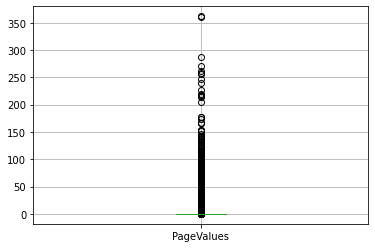

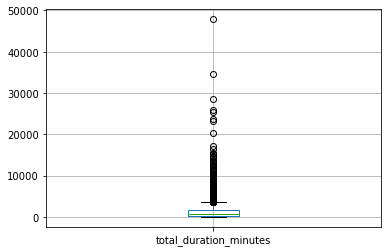

In [175]:
data_copy_3.boxplot(column=["PageValues"])
plt.show()
data_copy_3.boxplot(column=["total_duration_minutes"])
plt.show()

In [176]:
data_copy_3[data_copy_3["total_duration_minutes"] >30000]


,num_of_admin_pages,admin_page_duration_minutes,num_of_info_pages,info_page_duration_minutes,num_of_product_pages,product_page_duration_minutes,total_duration_minutes,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,user_type,Weekend,A,B,Month_cos,Month_sin,purchase
4378,17.0,2629.253968,24.0,2050.433333,705.0,43171.23338,47850.92068,0.004851,0.015431,0.763829,NaN,2.0,1.0,0.0,1.0,1.0,99.004626,-0.866025,5.000000e-01,0
7854,15.0,2657.318056,13.0,1949.166667,343.0,29970.46597,34576.95069,0.005316,0.028971,0.000000,0.0,2.0,1.0,0.0,0.0,1.0,87.801289,1.000000,-2.449294e-16,0


In [177]:
data_copy_3[data_copy_3["PageValues"] >300]

,num_of_admin_pages,admin_page_duration_minutes,num_of_info_pages,info_page_duration_minutes,num_of_product_pages,product_page_duration_minutes,total_duration_minutes,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,user_type,Weekend,A,B,Month_cos,Month_sin,purchase
7337,0.0,0.0,0.0,0.0,44.0,784.883333,NaN,0.0,0.004762,360.953384,0.0,8.0,9.0,0.0,0.0,1.0,91.345002,1.000000,-2.449294e-16,1
7855,3.0,37.5,0.0,0.0,18.0,607.500000,645.0,0.0,0.010526,361.763742,0.0,2.0,3.0,1.0,0.0,1.0,105.830682,0.866025,-5.000000e-01,1


In [178]:
outliers_total_duration_PageValues_list = data_copy_3[data_copy_3["total_duration_minutes"] >30000].index.tolist() \
+ data_copy_3[data_copy_3["PageValues"] >300].index.tolist()

data_copy_3.drop(index = outliers_total_duration_PageValues_list, inplace=True)



In [179]:
data_copy_3.shape

(10432, 20)

# Filling missing values


In [180]:
data_copy_3.isnull().sum()

num_of_admin_pages                588
admin_page_duration_minutes       407
num_of_info_pages                 679
info_page_duration_minutes        307
num_of_product_pages              392
product_page_duration_minutes     613
total_duration_minutes           4727
BounceRates                        14
ExitRates                          15
PageValues                         18
closeness_to_holiday              485
device                            318
Region                             11
user_type                          15
Weekend                            18
A                                 698
B                                  18
Month_cos                          14
Month_sin                          14
purchase                            0
dtype: int64

## dealing with duration features missing values

the total duration is the sum of info page duration, admin page duration, and product page duration, we could use <br>
this information to our advantage and fill out the missing values when only one of them is missing, without the need to assume anything!

In [181]:
total_duration_sum = data_copy_3.loc[:,"admin_page_duration_minutes"] + data_copy_3.loc[:,"info_page_duration_minutes"] + \
                     data_copy_3.loc[:,"product_page_duration_minutes"]


data_copy_3.loc[:,"total_duration_minutes"] = data_copy_3.loc[:,"total_duration_minutes"].fillna(total_duration_sum)

data_copy_3.isnull().sum() # we filled 4,154 missing values!

num_of_admin_pages               588
admin_page_duration_minutes      407
num_of_info_pages                679
info_page_duration_minutes       307
num_of_product_pages             392
product_page_duration_minutes    613
total_duration_minutes           573
BounceRates                       14
ExitRates                         15
PageValues                        18
closeness_to_holiday             485
device                           318
Region                            11
user_type                         15
Weekend                           18
A                                698
B                                 18
Month_cos                         14
Month_sin                         14
purchase                           0
dtype: int64

In [182]:
data_copy_3.loc[data_copy_3["admin_page_duration_minutes"].isnull()]

,num_of_admin_pages,admin_page_duration_minutes,num_of_info_pages,info_page_duration_minutes,num_of_product_pages,product_page_duration_minutes,total_duration_minutes,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,user_type,Weekend,A,B,Month_cos,Month_sin,purchase
10,0.0,NaN,0.0,0.00,6.0,98.000000,98.000,0.000000,0.066667,0.000000,0.0,2.0,1.0,0.0,0.0,0.0,101.221482,5.000000e-01,8.660254e-01,0
35,1.0,NaN,0.0,0.00,46.0,4084.393939,NaN,0.000000,0.001795,0.000000,0.0,2.0,8.0,0.0,0.0,0.0,105.036383,5.000000e-01,8.660254e-01,0
77,0.0,NaN,0.0,0.00,7.0,150.000000,NaN,0.057143,0.085714,0.000000,0.0,2.0,2.0,0.0,0.0,0.0,94.159648,5.000000e-01,8.660254e-01,0
91,0.0,NaN,0.0,0.00,6.0,415.000000,415.000,0.000000,0.033333,0.000000,0.4,1.0,3.0,0.0,0.0,NaN,92.003079,5.000000e-01,8.660254e-01,0
166,10.0,NaN,2.0,153.00,96.0,NaN,NaN,0.001961,0.013509,0.000000,0.0,NaN,6.0,0.0,1.0,1.0,100.279536,6.123234e-17,1.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,0.0,NaN,0.0,0.00,6.0,85.250000,NaN,0.000000,0.011111,0.000000,0.0,2.0,3.0,0.0,0.0,1.0,105.354236,1.000000e+00,-2.449294e-16,0
10391,0.0,NaN,NaN,NaN,14.0,999.000000,999.000,0.000000,0.023077,8.482952,0.0,2.0,3.0,0.0,0.0,0.0,89.947386,1.000000e+00,-2.449294e-16,1
10421,0.0,NaN,0.0,NaN,NaN,3414.875000,3414.875,0.012245,NaN,NaN,0.0,2.0,7.0,NaN,0.0,NaN,90.539626,NaN,NaN,0
10441,8.0,NaN,6.0,547.75,111.0,6340.152381,NaN,0.003361,0.009432,44.219794,0.0,3.0,6.0,0.0,0.0,1.0,96.859210,1.000000e+00,-2.449294e-16,0


we will do the same with the other duration features:

In [183]:
admin_duration_vector = data_copy_3.loc[:,"total_duration_minutes"] - data_copy_3.loc[:,"info_page_duration_minutes"] - \
                      data_copy_3.loc[:,"product_page_duration_minutes"]


data_copy_3.loc[:,"admin_page_duration_minutes"] = data_copy_3.loc[:,"admin_page_duration_minutes"].fillna(admin_duration_vector)

# admin missing values: 407 -> 215

print("left null values: ", data_copy_3["admin_page_duration_minutes"].isnull().sum())

left null values:  215


In [184]:
info_duration_vector = data_copy_3.loc[:,"total_duration_minutes"] - data_copy_3.loc[:,"admin_page_duration_minutes"] - \
                      data_copy_3.loc[:,"product_page_duration_minutes"]


data_copy_3.loc[:,"info_page_duration_minutes"] = data_copy_3.loc[:,"info_page_duration_minutes"].fillna(info_duration_vector)
# info missing values: 307 -> 172

print("left null values: ",data_copy_3["info_page_duration_minutes"].isnull().sum())

left null values:  172


In [185]:
product_duration_vector = data_copy_3.loc[:,"total_duration_minutes"] - data_copy_3.loc[:,"admin_page_duration_minutes"] - \
                      data_copy_3.loc[:,"info_page_duration_minutes"]


data_copy_3.loc[:,"product_page_duration_minutes"] = data_copy_3.loc[:,"product_page_duration_minutes"].fillna(product_duration_vector)
# product missing values: 613 -> 300

print("left null values: ",data_copy_3["product_page_duration_minutes"].isnull().sum())

left null values:  300


If the total_duration is zero, all the other durations must be zero as well:

In [186]:

total_duration_0_boolean = (data_copy_3["total_duration_minutes"]) == 0

data_copy_3.loc[total_duration_0_boolean,["product_page_duration_minutes","info_page_duration_minutes"\
,"admin_page_duration_minutes"]]  = 0


print("Duration columns left null values summery:")
print(data_copy_3[["product_page_duration_minutes","info_page_duration_minutes","admin_page_duration_minutes"]].isnull().sum())


# admin missing values: 215 -> 212
# info missing values: 172 -> 169
# product missing values: 300 -> 298

Duration columns left null values summery:
product_page_duration_minutes    298
info_page_duration_minutes       169
admin_page_duration_minutes      212
dtype: int64


We would like to check which columns still have many missing values and fill them according to correlations we found.

In [187]:
print("missing values per column:")
print(data_copy_3.isna().sum().sort_values(ascending=False))

missing values per column:
A                                698
num_of_info_pages                679
num_of_admin_pages               588
total_duration_minutes           573
closeness_to_holiday             485
num_of_product_pages             392
device                           318
product_page_duration_minutes    298
admin_page_duration_minutes      212
info_page_duration_minutes       169
PageValues                        18
Weekend                           18
B                                 18
ExitRates                         15
user_type                         15
BounceRates                       14
Month_cos                         14
Month_sin                         14
Region                            11
purchase                           0
dtype: int64


In [188]:
data_copy_3.corr()


,num_of_admin_pages,admin_page_duration_minutes,num_of_info_pages,info_page_duration_minutes,num_of_product_pages,product_page_duration_minutes,total_duration_minutes,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,user_type,Weekend,A,B,Month_cos,Month_sin,purchase
num_of_admin_pages,1.000000,0.594175,0.380803,0.249953,0.432424,0.369615,0.417065,-0.222345,-0.317649,0.107438,-0.099901,-0.009563,-0.007601,0.024195,0.027648,0.125777,-0.012839,0.058521,-0.142467,0.144722
admin_page_duration_minutes,0.594175,1.000000,0.266309,0.212358,0.270474,0.333802,0.420650,-0.143252,-0.205442,0.075931,-0.074046,-0.008437,-0.002605,0.026508,0.014206,0.094725,-0.013901,0.040190,-0.081112,0.100861
num_of_info_pages,0.380803,0.266309,1.000000,0.617418,0.356190,0.356296,0.400935,-0.118169,-0.168532,0.052106,-0.051682,-0.010410,-0.031973,-0.052244,0.032555,0.112144,-0.018649,0.046444,-0.062234,0.099464
info_page_duration_minutes,0.249953,0.212358,0.617418,1.000000,0.253947,0.318033,0.389385,-0.073918,-0.105517,0.030456,-0.035347,-0.011652,-0.025309,-0.042403,0.023953,0.089287,-0.012475,0.041036,-0.041283,0.073035
num_of_product_pages,0.432424,0.270474,0.356190,0.253947,1.000000,0.857808,0.847858,-0.204241,-0.295399,0.060604,-0.027389,0.001378,-0.043040,-0.124180,0.013289,0.057054,-0.012085,0.099085,-0.181001,0.159200
product_page_duration_minutes,0.369615,0.333802,0.356296,0.318033,0.857808,1.000000,0.993748,-0.186935,-0.257190,0.057649,-0.043237,0.002047,-0.034189,-0.116773,0.004256,0.069397,-0.016182,0.110287,-0.144060,0.158900
total_duration_minutes,0.417065,0.420650,0.400935,0.389385,0.847858,0.993748,1.000000,-0.194243,-0.267658,0.062708,-0.049143,-0.000623,-0.033857,-0.111021,0.007021,0.077578,-0.017354,0.108439,-0.145026,0.164514
BounceRates,-0.222345,-0.143252,-0.118169,-0.073918,-0.204241,-0.186935,-0.194243,1.000000,0.911260,-0.119203,0.081922,0.025148,-0.008582,-0.135092,-0.043835,-0.205718,0.008790,-0.071187,0.069451,-0.150395
ExitRates,-0.317649,-0.205442,-0.168532,-0.105517,-0.295399,-0.257190,-0.267658,0.911260,1.000000,-0.175854,0.111704,0.015885,-0.009375,-0.180536,-0.060175,-0.246522,0.006803,-0.088440,0.102903,-0.207203
PageValues,0.107438,0.075931,0.052106,0.030456,0.060604,0.057649,0.062708,-0.119203,-0.175854,1.000000,-0.063081,0.007153,0.006262,0.110014,0.007275,0.111864,-0.010576,0.038913,-0.062731,0.497454


### Dealing with A feature NaN values:
We saw that column "A" has high correlation with the "user_type" column. <br>
According to that, we will calculate the median of column "A" when someone is a returning user, and when someone is a new user. <br> we will fill NaN values accordingly.

In [189]:
# calculate median of "A" when dealing with a new visitor (1):
A_new_user_med = (data_copy_3["A"][data_copy_3["user_type"]==1]).median()
print("A 'new user' median: ",A_new_user_med)
# calculate median of "A" when dealing with a returning visitor (0):
A_returning_user_med = (data_copy_3["A"][data_copy_3["user_type"]==0]).median()
print("A 'returnning user' median: ", A_returning_user_med)
# filling NaN values in column "A"
data_copy_3.loc[data_copy_3["user_type"]==1, "A"] = data_copy_3.loc[data_copy_3["user_type"]==1,"A"].fillna(A_new_user_med)
data_copy_3.loc[data_copy_3["user_type"]==0, "A"] = data_copy_3.loc[data_copy_3["user_type"]==0,"A"].fillna(A_returning_user_med)
# we will fill 9 values that didn't change (user type was also NaN) to the median of column "A":
A_median_med = data_copy_3["A"].median()
data_copy_3["A"] = data_copy_3["A"].fillna(A_median_med)

print("NaN values in column 'A': ", data_copy_3["A"].isnull().sum())




A 'new user' median:  1.0
A 'returnning user' median:  0.0
NaN values in column 'A':  0


### Dealing with information pages + information duration features NaN values:
 * We initially thought about using these features correlation (0.617418) to predict one another.
 * However, these features consist mostly out of 0s. when we tried to split info_duration into 2 categories using info_num_of_pages (high num of pages/low num of pages), for example, we found out that both of these groups median is 0.
 * That's why we decided to use simple ways to fill the NaNs.
 * Duration is not bounded (AFK sessions can have too much influece) so we will use median, so we can avoid the scenario where few observations have a big impact on the mean. 
 * For num of info pages, we will use the mean.
 * We did not save the attempt as we would do something similar on Admin columns later

In [190]:
def fill_nans_by_median(data, col_name):
    data.loc[:,col_name] = data.loc[:,col_name].fillna(data[col_name].median())
    return data

def fill_nans_by_mean(data, col_name):
    data.loc[:,col_name] = data.loc[:,col_name].fillna(data[col_name].mean())
    return data

In [191]:
data_copy_3 = fill_nans_by_mean(data_copy_3, "num_of_info_pages")
data_copy_3 = fill_nans_by_median(data_copy_3, "info_page_duration_minutes")

### Dealing with closeness_to_holiday, sin/cos_month features NaN values:

We want to fill the month column with the most common value, we will use unique to test the different values and verify they are counted correctly

In [192]:
print(np.unique(data_copy_3["Month_cos"]))
print(np.unique(data_copy_3["Month_sin"]))

[-1.00000000e+00 -8.66025404e-01 -8.66025404e-01 -5.00000000e-01
 -1.83697020e-16  6.12323400e-17  5.00000000e-01  8.66025404e-01
  1.00000000e+00             nan]
[-1.00000000e+00 -8.66025404e-01 -8.66025404e-01 -5.00000000e-01
 -5.00000000e-01 -2.44929360e-16  1.22464680e-16  5.00000000e-01
  8.66025404e-01  1.00000000e+00             nan]


First, we will replace the values that strive for zero with actual zero, we do not want to treat them like separate values. <br>
we will also take care of the "duplicate" -0.8660254.

In [193]:
data_copy_3.loc[np.abs(data_copy_3["Month_sin"]) < 0.00001, "Month_sin"] = 0
data_copy_3.loc[np.abs(data_copy_3["Month_cos"]) < 0.00001, "Month_cos"] = 0
data_copy_3.loc[(data_copy_3["Month_cos"] > -0.8660255) & (data_copy_3["Month_cos"] < -0.8660250) , "Month_cos"] = -0.8660254
data_copy_3.loc[(data_copy_3["Month_sin"] > -0.8660255) & (data_copy_3["Month_sin"] < -0.8660250) , "Month_sin"] = -0.8660254

In [194]:
print(np.unique(data_copy_3["Month_cos"]))
print(np.unique(data_copy_3["Month_sin"]))

[-1.        -0.8660254 -0.5        0.         0.5        0.8660254
  1.               nan]
[-1.        -0.8660254 -0.5       -0.5        0.         0.5
  0.8660254  1.               nan]


In [195]:
print(data_copy_3["Month_sin"].value_counts())
data_copy_3["Month_cos"].value_counts()

 0.500000    2853
-0.500000    2527
 0.000000    1687
 1.000000    1611
-0.866025     833
-1.000000     379
-0.500000     366
 0.866025     162
Name: Month_sin, dtype: int64


-0.866025    3219
 0.866025    2527
 0.000000    1990
 1.000000    1439
 0.500000     632
-0.500000     363
-1.000000     248
Name: Month_cos, dtype: int64

(0.5, -0.866025) is a legal combination in our sin and cos columns, so we will fill the NaN values with this combination:

In [196]:
data_copy_3.loc[:,"Month_sin"] = data_copy_3.loc[:,"Month_sin"].fillna(data_copy_3["Month_sin"].mode()[0])
data_copy_3.loc[:,"Month_cos"] = data_copy_3.loc[:,"Month_cos"].fillna(data_copy_3["Month_cos"].mode()[0])

Closeness to holiday has a good correlation with Month_cos, we will try to use it to fill the NaN values:

In [197]:
high_cos = data_copy_3[data_copy_3["Month_cos"] > data_copy_3["Month_cos"].median()]
low_cos = data_copy_3[data_copy_3["Month_cos"] <= data_copy_3["Month_cos"].median()]

print("low cos median:", low_cos["closeness_to_holiday"].median())
print("high cos median:", high_cos["closeness_to_holiday"].median())

low cos median: 0.0
high cos median: 0.0


It seems we did not manage to find a distinction, let's try to test why:

In [198]:
print(data_copy_3["closeness_to_holiday"].value_counts())
print("total_non nan values", data_copy_3["closeness_to_holiday"].value_counts().sum()) # total

print(data_copy_3["closeness_to_holiday"].isna().sum(), 'null values') # null values

0.0    8925
0.6     290
0.8     265
0.4     197
0.2     147
1.0     123
Name: closeness_to_holiday, dtype: int64
total_non nan values 9947
485 null values


Seems like 89.7% of the values are 0, we have 485 nan-values. if we convert them all into 0, then 90.2% of the values will be 0.
We thought it is not dramatic so we did that.

In [199]:
data_copy_3.loc[:,"closeness_to_holiday"] = data_copy_3.loc[:,"closeness_to_holiday"].fillna(0)

### Dealing with device feature NaN values:
device does not have interesting correlations, let's try to analyze it:

In [200]:
print(data_copy_3["device"].value_counts())
print("\n number of NaNs:", data_copy_3["device"].isnull().sum())
data_copy_3[["device","purchase"]].corr()

2.0    5403
1.0    2124
3.0    2116
4.0     384
8.0      62
6.0      18
5.0       4
7.0       3
Name: device, dtype: int64

 number of NaNs: 318


,device,purchase
device,1.00000,-0.02269
purchase,-0.02269,1.00000


Seems like 2.0 is the most popular by a wide margin. after giving some thought to filling NaNs in proportion to every device value, we decided that the number of NaNs is not big enough to do that. Moreover, this feature does not strike as too important to begin with, so we will just fill it with the mode value 2.0 :

In [201]:
data_copy_3.loc[:,"device"] = data_copy_3.loc[:,"device"].fillna(data_copy_3["device"].mode()[0])

### Dealing with admin pages + admin duration features NaN values:
 * those features have a strong correlation (0.594175), we will use each of them to predict the other.
 * Duration is not bounded so we will use median, so we can avoid the scenario where few observations have a big impact on the mean.
 * If we do the process sequentially, the second prediction process would be affected by the first's predicted values, so we will do the process in parallel, we would fill the NA values only in the end.

In [202]:
def getting_big_and_small_med(data, splitby, tocomp):
    splitby_median = data[splitby].median() 
    big_splitby_tocompMedian = data[data[splitby] >= splitby_median]\
        [tocomp].median()
    short_splitby_tocompMedian = data[data[splitby] < splitby_median]\
        [tocomp].median()
    return splitby_median, big_splitby_tocompMedian, short_splitby_tocompMedian


def filling_big_and_small_med_nans(data, splitby, splitby_median, tocomp, tocomp_Bmed, tocomp_Smed):
    data.loc[data[splitby] >= splitby_median, tocomp] = \
        data.loc[data[splitby] >= splitby_median, tocomp].\
            fillna(tocomp_Bmed)
    
    data.loc[data[splitby] < splitby_median, tocomp] = \
        data.loc[data[splitby] < splitby_median, tocomp].\
            fillna(tocomp_Smed)
    return data

In [203]:
# getting num_of_page_medians, splitting using durations
admin_page_duration_median, long_admin_page_duration_numOfPageMedian,short_admin_page_duration_numOfPageMedian = getting_big_and_small_med(data_copy_3, "admin_page_duration_minutes", "num_of_admin_pages")
# getting admin_page_duration_medians, splitting using num_of_pages
admin_numOfPages_median, big_admin_numOfPages_adminPageDurationMedian, small_admin_numOfPages_adminPageDurationMedian = getting_big_and_small_med(data_copy_3, "num_of_admin_pages", "admin_page_duration_minutes")

# fill num_of_admin_pages nans
data_copy_3 = filling_big_and_small_med_nans(data_copy_3, "admin_page_duration_minutes", admin_page_duration_median, "num_of_admin_pages" , long_admin_page_duration_numOfPageMedian, short_admin_page_duration_numOfPageMedian)


# fill admin_page_duration nans
data_copy_3 = filling_big_and_small_med_nans(data_copy_3, "num_of_admin_pages", admin_numOfPages_median, "admin_page_duration_minutes", big_admin_numOfPages_adminPageDurationMedian, small_admin_numOfPages_adminPageDurationMedian)

fill the leftovers with the mean/median, we will use median for the time because the threat of users being AFK and influencing the mean too much:

In [204]:
data_copy_3 = fill_nans_by_mean(data_copy_3, "num_of_admin_pages")
data_copy_3 = fill_nans_by_median(data_copy_3, "admin_page_duration_minutes")

### NaN check status:

In [205]:
data_copy_3.isnull().sum()

num_of_admin_pages                 0
admin_page_duration_minutes        0
num_of_info_pages                  0
info_page_duration_minutes         0
num_of_product_pages             392
product_page_duration_minutes    298
total_duration_minutes           573
BounceRates                       14
ExitRates                         15
PageValues                        18
closeness_to_holiday               0
device                             0
Region                            11
user_type                         15
Weekend                           18
A                                  0
B                                 18
Month_cos                          0
Month_sin                          0
purchase                           0
dtype: int64

In [206]:
data_copy_3[["total_duration_minutes","num_of_product_pages","product_page_duration_minutes"]].corr()

,total_duration_minutes,num_of_product_pages,product_page_duration_minutes
total_duration_minutes,1.000000,0.847858,0.993748
num_of_product_pages,0.847858,1.000000,0.857808
product_page_duration_minutes,0.993748,0.857808,1.000000


### Linear Regression model to deal with total_duration, product_page_duration


We saw extremely high corellation (0.993748) between the columns "total_duration_minutes" and "product_page_duration_minutes". <br>
It makes sense that a customer that spends more time on the product pages will be more time in the site in total because<br>
the product is usually what the customer is truly interested in.<br>

We will do the following based on the correlations shown above:

* We will use num_of_products correlation with product_duration and and use a linear model to fill out all of product_duration values (few would be predicted by median after)
* Now that we have all of product_duration values, we will use this feature to predict total_duration, using another linear regression, this prediction should be our best one.
* Later on, we will need to get rid of either total_duration or product_duration, because they offer us the "same" information - We used our best correlation to predict total_duration, so we decided we would get rid of Product_duration (we would do it after we deal with all the NaNs)
* We will also use a linear regression to predict num of product using product duration, as the linear relationship is symmetric.

In [207]:
# function to fill column NaN values based on linear regression model 
def LinearRegression_column_complete(x_column, labels_column, data):
    X_train = data[x_column][data[labels_column].notna()].to_frame()
    y_train = data[labels_column][data[labels_column].notna()].to_frame()
    X_test = data[x_column][data[labels_column].isna()].to_frame()

    LR = LinearRegression()
    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)

    data_isna = data[data[labels_column].isna()]
    data_isna.loc[:,labels_column] = y_pred
    data = data[data[labels_column].notna()]
    data = data.append(data_isna)
    return data

In [208]:
# Fill "product_page_duration_minutes" NaN values with linear regression based on column "num_of_product_pages"
data_to_keep = data_copy_3[data_copy_3["num_of_product_pages"].isna()] 
data_to_predict = data_copy_3[data_copy_3["num_of_product_pages"].notna()]
data_to_predict = LinearRegression_column_complete("num_of_product_pages","product_page_duration_minutes" , data_to_predict)
data_copy_3 = data_to_keep.append(data_to_predict)

#fill  the rest of nan values in column "product_page_duration_minutes" with the column median
prod_p_dur_med = data_copy_3["product_page_duration_minutes"].median()
data_copy_3["product_page_duration_minutes"].fillna(prod_p_dur_med,inplace=True)
warnings.filterwarnings("ignore")

In [209]:
# Fill "total_duration" NaN values with linear regression based on column "product_page_duration_minutes"
# no NaN so we do not need to split
data_copy_3 = LinearRegression_column_complete("product_page_duration_minutes", "total_duration_minutes", data_copy_3)
warnings.filterwarnings("ignore")


In [210]:
# Fill "num_of_product_pages" NaN values with linear regression based on column "product_page_duration_minutes"

data_copy_3 = LinearRegression_column_complete("product_page_duration_minutes", "num_of_product_pages", data_copy_3)
warnings.filterwarnings("ignore")

### Dealing with all the other features with low NaN count:

In [211]:
data_copy_3.isnull().sum()

num_of_admin_pages                0
admin_page_duration_minutes       0
num_of_info_pages                 0
info_page_duration_minutes        0
num_of_product_pages              0
product_page_duration_minutes     0
total_duration_minutes            0
BounceRates                      14
ExitRates                        15
PageValues                       18
closeness_to_holiday              0
device                            0
Region                           11
user_type                        15
Weekend                          18
A                                 0
B                                18
Month_cos                         0
Month_sin                         0
purchase                          0
dtype: int64

We will use a trivial solution (median) as being inaccurate about few observations is not drastic.

In [212]:
col_with_nan_list = ["BounceRates", "ExitRates", "PageValues","Region","user_type","Weekend", "B"]
for col in col_with_nan_list:
    data_copy_3.loc[:,col] = data_copy_3.loc[:,col].fillna(data_copy_3[col].median())



## Filter features:
As we know, large amount of features can greatly increase the model variance. <br>
Taking that into account, We would not want unnecessary features, especially when they can expose us to noise, without new information.<br>
According to that, we would want to reduce the features number as much as we can without losing much information.
1. We will remove features which have a very high correlation with other features.<br>  

As we seen before, we have two extremely high correlations:

In [213]:
data_copy_3[["product_page_duration_minutes", "total_duration_minutes", "num_of_product_pages"]].corr()

,product_page_duration_minutes,total_duration_minutes,num_of_product_pages
product_page_duration_minutes,1.000000,0.993924,0.863142
total_duration_minutes,0.993924,1.000000,0.855612
num_of_product_pages,0.863142,0.855612,1.000000


According to that, we decided to remove the "product_page_duration_minutes" column, as we used less precise predictions for this column (total_duration was predicted with almost r=1 correlation):

In [214]:
del data_copy_3["product_page_duration_minutes"]

# Normalize our data
Our data features are given in different scales, and some models are influenced by the scale of the data (KNN is an example of such model) when we would not want them to.
We will use normalization to nullify such biases, so we could use all of our models effectively with a uniform scale.
In order to do that, we will need to devide our training data to "training" and "validation" sets first.
After that, we will fit our normalization model  solely on the training set and will transform both the training and validation sets.

* We chose StandardScaler because we did not want extreme values "ruining" our scale, which is a threat when using MinMax scaling.
* We also tried using MinMax scaling for SVM, we figured the runtime would be faster when the values are constrained between 0 and 1, but the results were not as good as StandardScaler.

In [215]:
#Converting data to numpy arrays
X, y = data_copy_3.values[:,:-1], data_copy_3.values[:, -1]
print(f'X shape: {X.shape}, y shape: {y.shape}')

# Spliting training data to "train" and "validation" data:
# The ratio would be 20% to the test set and 80% to the training set.
X_train_raw ,X_validation_raw, y_train, y_validation,= train_test_split(X,y,test_size = 0.2, train_size = 0.8, random_state= 42, shuffle=True)

# normalize to have 0 mean and 1 variance (according to train distribution)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_validation = scaler.transform(X_validation_raw)
print(f'X_train shape: {X_train.shape}, X_validation shape: {X_validation.shape}')

X shape: (10432, 18), y shape: (10432,)
X_train shape: (8345, 18), X_validation shape: (2087, 18)


# Dimensionality Reduction

We will start evaluating our models first with PCA, forward selection is model dependant so we will use it (or another form of feature selection which keeps) after we decide the best model for our project.

In [216]:
pca = PCA(0.99)
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
X_validation_PCA = pca.transform(X_validation)

In [217]:
X_train_PCA.shape ## we got rid of 1 dimensions

(8345, 17)

In [218]:
def Roc_plot_Kfold(estimator, X, y):

    cv = StratifiedKFold(n_splits=5)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
     estimator.fit(X[train], y[train])
     viz = RocCurveDisplay.from_estimator(
        estimator,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.8,
        lw=1,
        ax=ax,)
     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
     interp_tpr[0] = 0.0
     tprs.append(interp_tpr)
     aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    ax.plot(
     mean_fpr,
     mean_tpr,
     color="b",
     label=r"Mean ROC (AUC = %0.2f)" % (mean_auc),
      lw=2,
     alpha=0.8,
    )


    ax.set(
        xlim=[-0.05, 1.05],
     ylim=[-0.05, 1.05],
     title="Receiver operating characteristic example",
    )
    ax.legend(loc="lower right")
    plt.show()
    

# Model Selection
## KNN

We will start by testing a simple model - KNN, we will use a square root of our sample size as an anchor, and try researching more options.

In [219]:
math.sqrt(X_train_PCA.shape[0])

91.35097153287424

In [220]:
param_grid = {
    'n_neighbors' : [91,88,85,82,79,94,97,100,103]
}

optimizer = GridSearchCV (KNeighborsClassifier(), param_grid, scoring="roc_auc", n_jobs=4)
optimizer.fit(X_train_PCA,y_train)
warnings.filterwarnings("ignore")

In [221]:
optimizer.best_params_

{'n_neighbors': 85}

In [222]:
optimizer.best_score_

0.8536981614500754

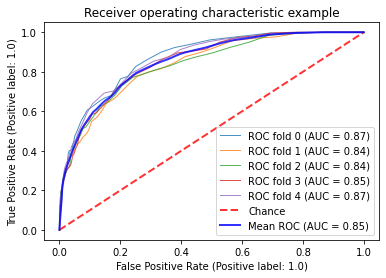

In [223]:
knn = KNeighborsClassifier(n_neighbors=85)
Roc_plot_Kfold(knn,X_train_PCA,y_train)   # this graph mean equals best score above, as this is the same calculation

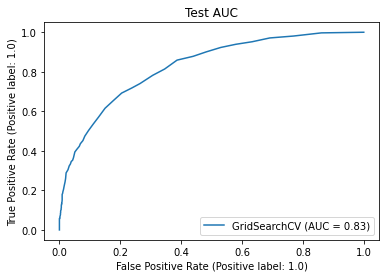

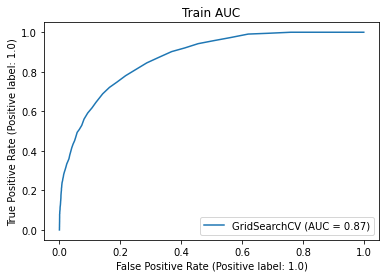

In [224]:
RocCurveDisplay.from_estimator(optimizer,X_validation_PCA,y_validation)
plt.title('Test AUC')

RocCurveDisplay.from_estimator(optimizer,X_train_PCA,y_train)
plt.title('Train AUC')
warnings.filterwarnings("ignore")


Seems like there is no overfit, AUC scores are pretty close to each other.

We later tested a wide range of k values, from 1-200, and saw that 85 was truly the best selection. We are not adding it here for comfort, as we did not feel like we did anything worth adding (just ran a more thorough test).

## Logistic Regression

In [225]:
Cs = [10**x for x in range(-6,6)]


param_grid = {
    'C' : Cs,
    'penalty' : ['l2','l1'],
    'solver' : ['liblinear'],
    'random_state' : [0]
}

optimizer = GridSearchCV (LogisticRegression(), param_grid, scoring="roc_auc", n_jobs=4)
optimizer.fit(X_train_PCA,y_train)
warnings.filterwarnings("ignore")


In [226]:
optimizer.best_params_

{'C': 0.01, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}

In [227]:
optimizer.best_score_

0.901242670432076

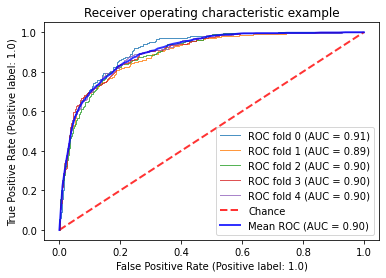

In [228]:
l_r = LogisticRegression(C=0.01, penalty = 'l2', random_state=0, solver ="liblinear")
Roc_plot_Kfold(l_r,X_train_PCA,y_train) # this graph mean equals best score above, as this is the same calculation

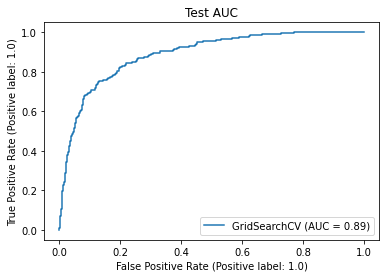

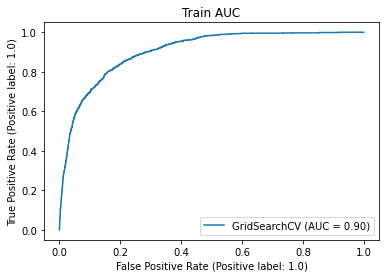

In [229]:
RocCurveDisplay.from_estimator(optimizer,X_validation_PCA,y_validation)
plt.title('Test AUC')

RocCurveDisplay.from_estimator(optimizer,X_train_PCA,y_train)  # seems like there is no overfit, AUCs are pretty close
plt.title('Train AUC')
warnings.filterwarnings("ignore")


## SVM


In [230]:
# param_grid = {'C': [0.1,1, 10, 100],               # initial starting parameters
 #               'gamma' : [10,1,0.1,0.01,0.001],  0.89 auc
  #               'random_state' : [0]
# 'kernel': ['rbf']}

# param_grid = {'C': [0.1,1,10],                             
    #        'kernel': ['linear'], 0.89 auc
     #       'random_state' : [0]
# }

param_grid = {'C': [10,100],               
               'gamma' : [0.01,0.001],  
                'random_state' : [0],
                  'kernel': ['rbf']}
            

optimizer = GridSearchCV (SVC(), param_grid, scoring="roc_auc", n_jobs=4)
optimizer.fit(X_train_PCA,y_train)
warnings.filterwarnings("ignore")


In [231]:
optimizer.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 0}

In [232]:
optimizer.best_score_

0.895432279365958

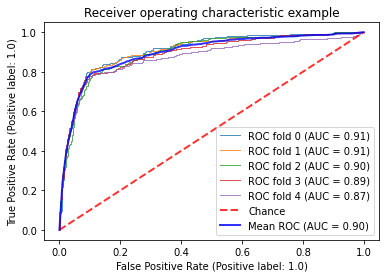

In [233]:
svm = SVC(C=10, gamma = 0.001, random_state=0, kernel="rbf")
Roc_plot_Kfold(svm,X_train_PCA,y_train) # this graph mean equals best score above, as this is the same calculation

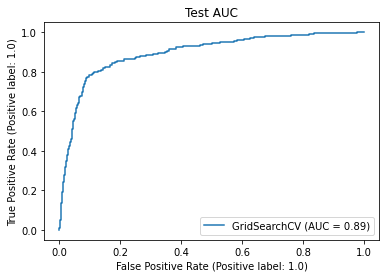

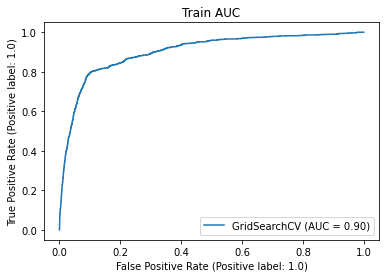

In [234]:
RocCurveDisplay.from_estimator(optimizer,X_validation_PCA,y_validation)
plt.title('Test AUC')

RocCurveDisplay.from_estimator(optimizer,X_train_PCA,y_train)  # seems like there is no overfit, AUCs are pretty close
plt.title('Train AUC')
warnings.filterwarnings("ignore")


## Neural Networks

We ran many different combinations for our NN testing, we will not show all of them out of runtime considerations, but we would show how we decided to use only 1 hidden layer, after noticing more than this leads to overfitting with no real value for our validation set (which is practically our test set).

In [235]:
mlp = MLPClassifier(max_iter=200, verbose=True, random_state=0)

param_grid = {
    'hidden_layer_sizes': [(50,50)],                                                    
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'], }
    
optimizer = GridSearchCV (mlp, param_grid, scoring="roc_auc", n_jobs=4)
optimizer.fit(X_train_PCA,y_train)
warnings.filterwarnings("ignore")
                  

Iteration 1, loss = 0.44668432
Iteration 2, loss = 0.31389219
Iteration 3, loss = 0.28021461
Iteration 4, loss = 0.26764788
Iteration 5, loss = 0.26061526
Iteration 6, loss = 0.25496327
Iteration 7, loss = 0.25051747
Iteration 8, loss = 0.24635185
Iteration 9, loss = 0.24229174
Iteration 10, loss = 0.23956776
Iteration 11, loss = 0.23704930
Iteration 12, loss = 0.23411043
Iteration 13, loss = 0.23213509
Iteration 14, loss = 0.23017454
Iteration 15, loss = 0.22875390
Iteration 16, loss = 0.22780139
Iteration 17, loss = 0.22498878
Iteration 18, loss = 0.22404302
Iteration 19, loss = 0.22294291
Iteration 20, loss = 0.22079302
Iteration 21, loss = 0.22010950
Iteration 22, loss = 0.21863122
Iteration 23, loss = 0.21767967
Iteration 24, loss = 0.21668221
Iteration 25, loss = 0.21642025
Iteration 26, loss = 0.21569423
Iteration 27, loss = 0.21303505
Iteration 28, loss = 0.21272347
Iteration 29, loss = 0.21168300
Iteration 30, loss = 0.21049752
Iteration 31, loss = 0.21016093
Iteration 32, los

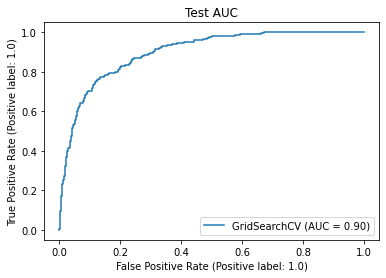

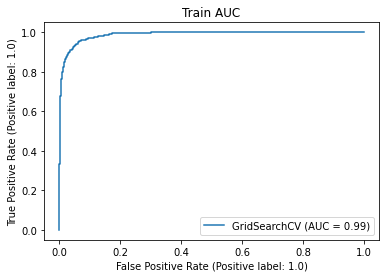

In [236]:
RocCurveDisplay.from_estimator(optimizer,X_validation_PCA,y_validation)
plt.title('Test AUC')

RocCurveDisplay.from_estimator(optimizer,X_train_PCA,y_train)
plt.title('Train AUC')
warnings.filterwarnings("ignore")


There is obvious overfitting here, we then changed the activation function to logistic, but there was still overfitting with 2 layers - so we chose to use one layer.

That is the model we chose:

In [237]:
mlp = MLPClassifier(max_iter=200, verbose=True, random_state=0)

# param_grid = {
    # 'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],   
   # 'activation': ['tanh', 'relu'],
   # 'solver': ['sgd', 'adam'],
   # 'alpha': [0.0001, 0.05],
  #  'learning_rate': ['constant','adaptive'], }       # examples for diff tests


 # param_grid = {
  #  'hidden_layer_sizes': [(100,)],
   # 'activation': ['logistic','relu','tanh'],       
   # 'solver': ['adam','sgd','lbfgs'],
    #'alpha': [0.0001,0.00001],
   # 'learning_rate': ['constant'], }



param_grid = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['logistic'],
    'solver': ['adam'],
    'alpha': [0.00005],
    'learning_rate': ['constant'], }
    
optimizer = GridSearchCV (mlp, param_grid, scoring="roc_auc", n_jobs=4)
optimizer.fit(X_train_PCA,y_train)
warnings.filterwarnings("ignore")
                  

Iteration 1, loss = 0.53530364
Iteration 2, loss = 0.38289736
Iteration 3, loss = 0.35597405
Iteration 4, loss = 0.33717426
Iteration 5, loss = 0.32254348
Iteration 6, loss = 0.31139541
Iteration 7, loss = 0.30235256
Iteration 8, loss = 0.29535051
Iteration 9, loss = 0.29004930
Iteration 10, loss = 0.28577231
Iteration 11, loss = 0.28239422
Iteration 12, loss = 0.27987820
Iteration 13, loss = 0.27799569
Iteration 14, loss = 0.27645666
Iteration 15, loss = 0.27535450
Iteration 16, loss = 0.27446517
Iteration 17, loss = 0.27369914
Iteration 18, loss = 0.27300879
Iteration 19, loss = 0.27249622
Iteration 20, loss = 0.27201221
Iteration 21, loss = 0.27163405
Iteration 22, loss = 0.27105952
Iteration 23, loss = 0.27072372
Iteration 24, loss = 0.27027324
Iteration 25, loss = 0.26981544
Iteration 26, loss = 0.26940500
Iteration 27, loss = 0.26897494
Iteration 28, loss = 0.26867047
Iteration 29, loss = 0.26813651
Iteration 30, loss = 0.26753505
Iteration 31, loss = 0.26735252
Iteration 32, los

In [238]:
optimizer.best_params_

{'activation': 'logistic',
 'alpha': 5e-05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [239]:
optimizer.best_score_

0.9201363015477446

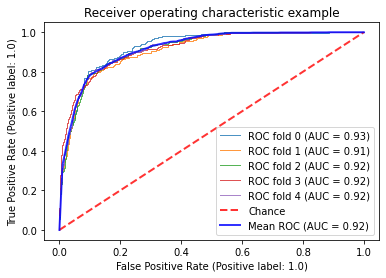

In [240]:
n_n = MLPClassifier(max_iter=200, random_state=0, activation='logistic', alpha=0.00005,\
    hidden_layer_sizes=(100,),learning_rate='constant', solver='adam')

Roc_plot_Kfold(n_n,X_train_PCA,y_train) # this graph mean equals best score above, as this is the same calculation


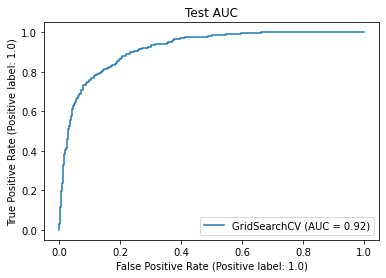

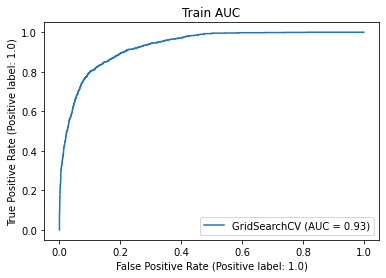

In [241]:
RocCurveDisplay.from_estimator(optimizer,X_validation_PCA,y_validation)
plt.title('Test AUC')

RocCurveDisplay.from_estimator(optimizer,X_train_PCA,y_train)
plt.title('Train AUC')
warnings.filterwarnings("ignore")


In [242]:
roc_auc_score(y_validation,optimizer.predict_proba(X_validation_PCA)[:,1])

0.9186384976525822

## Confusion_Matrix

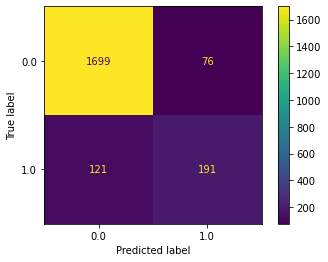

In [243]:
plot_confusion_matrix(optimizer,X_validation_PCA,y_validation)
warnings.filterwarnings("ignore")

* We can clearly see that most of the time, there is no purchase (label 0).
* The model has 1699 TN, We said there was no purchase and we were right.
* The model has 191 TP, We said there is a purchase and we were right.
* The model has 121 FN, We said there is no purchase while there was a purchase.
* The model has 76 FP, We said there is a purchase while there was no purchase.

Conclusion:

* When we say there is no purchase, we are usually right, specificity - (1699/1775).
* When we say there is a purchase, we are often wrong, TPR - (191/312)


## Verdict

it seems like our model has good results with logistic regression and NN with logistic activation function, We also tried using trees for our own understanding and saw that trees are not doing so well, which hints that the model is truly linear (trees do not do well with linear classifications), next steps:

* we will try to use logistic regression to evaluate feature importance using the weights, we can do it because our data is normalized on the same scale.
* we will use this information to test a final NN model with less features and no PCA, if it does good we will choose it as the final model.

## logistic regression - features evaluation

In [244]:
Cs = [10**x for x in range(-6,6)]


param_grid = {
    'C' : Cs,
    'penalty' : ['l2','l1'],
    'solver' : ['liblinear'],
    'random_state' : [0]
}

optimizer = GridSearchCV (LogisticRegression(), param_grid, scoring="roc_auc", n_jobs=4)
optimizer.fit(X_train,y_train)
warnings.filterwarnings("ignore")


In [245]:
optimizer.best_params_

{'C': 0.01, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}

0.8973799205489347

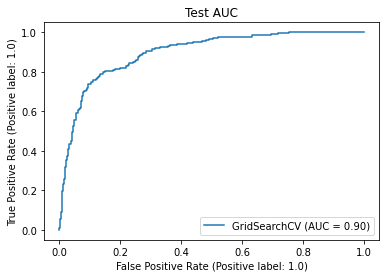

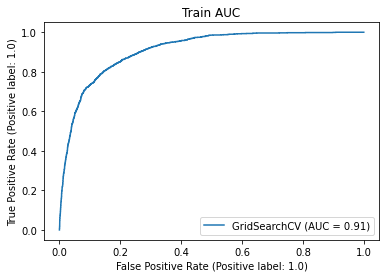

In [246]:
RocCurveDisplay.from_estimator(optimizer,X_validation,y_validation)
plt.title('Test AUC')

RocCurveDisplay.from_estimator(optimizer,X_train,y_train)
plt.title('Train AUC')

roc_auc_score(y_validation,optimizer.predict_proba(X_validation)[:,1])


In [247]:
lr = LogisticRegression(C = 0.01, penalty ='l1', random_state = 0,  solver = 'liblinear')
lr.fit(X_train,y_train)
warnings.filterwarnings("ignore")


1. PageValues - score: 1.28
2. ExitRates - score: -0.34
3. Month_sin - score: -0.21
4. A - score: 0.10
5. total_duration_minutes - score: 0.08
6. num_of_product_pages - score: 0.08
7. Month_cos - score: 0.03
8. user_type - score: 0.02
9. Weekend - score: 0.00
10. Region - score: 0.00
11. device - score: 0.00
12. closeness_to_holiday - score: 0.00
13. B - score: 0.00
14. BounceRates - score: 0.00
15. info_page_duration_minutes - score: 0.00
16. num_of_info_pages - score: 0.00
17. admin_page_duration_minutes - score: 0.00
18. num_of_admin_pages - score: 0.00


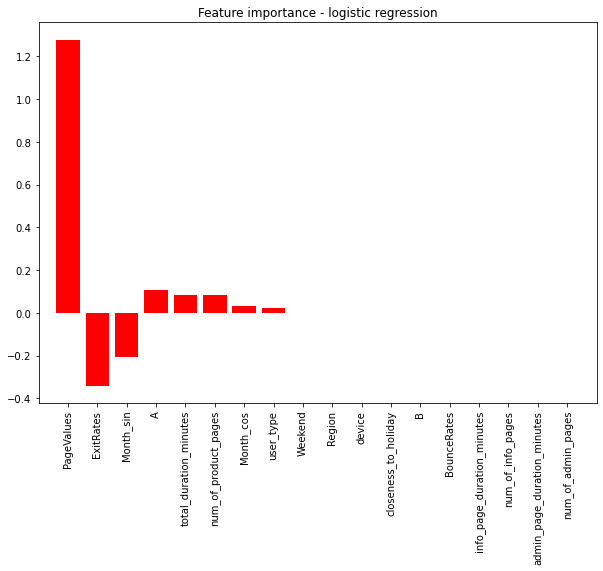

In [248]:
importances = lr.coef_[0]

indices = np.argsort(np.abs(importances))[::-1]

for i,feature in enumerate(data_copy_3.columns[indices]):
	print(("{}. {} - score: {:.2f}").format(i+1, feature, importances[indices][i]))


plt.figure(figsize=(10,7))
plt.title('Feature importance - logistic regression')

plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), data_copy_3.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

We found out the important features in our model, the optimal way to use our model (based on cross validation) is lasso penalization, which can nullify features completely. The coefs are all on the same scale, as we normalized them earlier, so we can conclude that this graph gives valid information:
* PageValue is a really important feature to predict a purchase
* The optimal model seems to use the month columns we engineered, it was probably a good idea!
* Many features are unnecessary for an ideal model, we will test it again with NN!

## Testing NN without Zero importance feautures

In [249]:
X_train_feature_selection = X_train[:, indices[:8]]
X_validation_feature_selection = X_validation[:, indices[:8]]

Initial test:

In [250]:
# param_grid = {
  #   'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
 #   'activation': ['tanh', 'relu','logistic'],                                 
#    'solver': ['sgd', 'adam'],
#    'alpha': [0.0001, 0.05],
#  'learning_rate': ['constant'], }

Best parameters:

In [251]:
# {'activation': 'tanh', 
# 'alpha': 0.05,
# 'hidden_layer_sizes': (50, 50, 50),
# 'learning_rate': 'constant',
# 'solver': 'adam'}

Further exploration (we will not show all the combinations we tried because of runtime):

In [252]:
mlp = MLPClassifier(max_iter=200, verbose=True, random_state=0)

param_grid = {
    'hidden_layer_sizes': [(50,50)],   
   'activation': ['tanh'],
   'solver': ['adam'],
   'alpha': [0.01,0.025,0.001],
 'learning_rate': ['constant'], }
    
optimizer = GridSearchCV (mlp, param_grid, scoring="roc_auc", n_jobs=4)
optimizer.fit(X_train_feature_selection,y_train)
warnings.filterwarnings("ignore")

Iteration 1, loss = 0.40321504
Iteration 2, loss = 0.28758609
Iteration 3, loss = 0.28061966
Iteration 4, loss = 0.27707562
Iteration 5, loss = 0.27313353
Iteration 6, loss = 0.26895015
Iteration 7, loss = 0.26495812
Iteration 8, loss = 0.26136348
Iteration 9, loss = 0.25812918
Iteration 10, loss = 0.25523945
Iteration 11, loss = 0.25366226
Iteration 12, loss = 0.25207634
Iteration 13, loss = 0.25140061
Iteration 14, loss = 0.24917034
Iteration 15, loss = 0.24891551
Iteration 16, loss = 0.24750948
Iteration 17, loss = 0.24661281
Iteration 18, loss = 0.24639897
Iteration 19, loss = 0.24463188
Iteration 20, loss = 0.24402367
Iteration 21, loss = 0.24333557
Iteration 22, loss = 0.24301772
Iteration 23, loss = 0.24217285
Iteration 24, loss = 0.24152822
Iteration 25, loss = 0.24064664
Iteration 26, loss = 0.24025078
Iteration 27, loss = 0.24015810
Iteration 28, loss = 0.23992189
Iteration 29, loss = 0.23924093
Iteration 30, loss = 0.23937572
Iteration 31, loss = 0.23805008
Iteration 32, los

In [253]:
optimizer.best_params_

{'activation': 'tanh',
 'alpha': 0.025,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [254]:
optimizer.best_score_

0.9291872551943072

0.9290501986276634

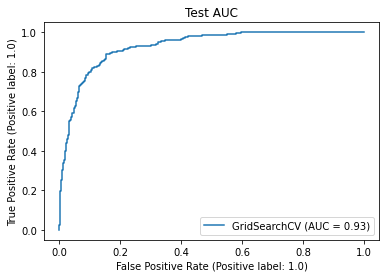

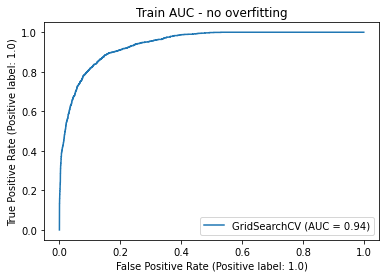

In [255]:
RocCurveDisplay.from_estimator(optimizer,X_validation_feature_selection,y_validation)
plt.title('Test AUC')

RocCurveDisplay.from_estimator(optimizer,X_train_feature_selection,y_train)
plt.title('Train AUC - no overfitting')

roc_auc_score(y_validation,optimizer.predict_proba(X_validation_feature_selection)[:,1])

It seems like we have a final model!

## Final Model - NN

In [256]:
final_scaler = StandardScaler()

X_standard = final_scaler.fit_transform(X)

X_final_train = X_standard[:, indices[:8]]


We will not show all the testings out of runtime considerations.

In [257]:
mlp = MLPClassifier(max_iter=300, verbose=True, random_state=0)

param_grid = {
    'hidden_layer_sizes': [(55,55,55)],   
   'activation': ['logistic'],
   'solver': ['adam'],
   'alpha': [0.01,0.001,0.0001],
 'learning_rate': ['constant'], }
    
optimizer = GridSearchCV (mlp, param_grid, scoring="roc_auc", n_jobs=4)
optimizer.fit(X_final_train,y)
warnings.filterwarnings("ignore")



Iteration 1, loss = 0.47352534
Iteration 2, loss = 0.42644124
Iteration 3, loss = 0.42038401
Iteration 4, loss = 0.40909251
Iteration 5, loss = 0.38728515
Iteration 6, loss = 0.35371620
Iteration 7, loss = 0.31766904
Iteration 8, loss = 0.28933458
Iteration 9, loss = 0.27602640
Iteration 10, loss = 0.27120709
Iteration 11, loss = 0.26798836
Iteration 12, loss = 0.26666463
Iteration 13, loss = 0.26620545
Iteration 14, loss = 0.26336916
Iteration 15, loss = 0.26258581
Iteration 16, loss = 0.26116686
Iteration 17, loss = 0.26005788
Iteration 18, loss = 0.25897126
Iteration 19, loss = 0.25859622
Iteration 20, loss = 0.25810617
Iteration 21, loss = 0.25715038
Iteration 22, loss = 0.25700451
Iteration 23, loss = 0.25650668
Iteration 24, loss = 0.25597329
Iteration 25, loss = 0.25541779
Iteration 26, loss = 0.25504848
Iteration 27, loss = 0.25424498
Iteration 28, loss = 0.25558949
Iteration 29, loss = 0.25410640
Iteration 30, loss = 0.25392444
Iteration 31, loss = 0.25451124
Iteration 32, los

In [258]:
optimizer.best_params_

{'activation': 'logistic',
 'alpha': 0.01,
 'hidden_layer_sizes': (55, 55, 55),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [259]:
optimizer.best_score_

0.9049388513057925

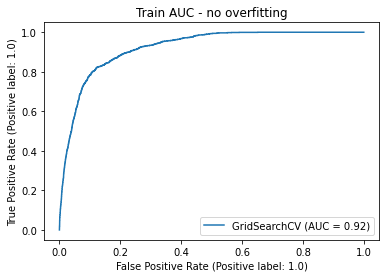

In [260]:
RocCurveDisplay.from_estimator(optimizer,X_final_train,y)
plt.title('Train AUC - no overfitting')
warnings.filterwarnings("ignore")

In [261]:
Final_NN =  MLPClassifier(max_iter=300, verbose=True, random_state=0, hidden_layer_sizes =(55,55,55), \
   activation = 'logistic', solver = 'adam', alpha = 0.001, learning_rate = 'constant')

Final_NN.fit(X_final_train,y)   # final model
warnings.filterwarnings("ignore")

Iteration 1, loss = 0.47248796
Iteration 2, loss = 0.42523941
Iteration 3, loss = 0.41880514
Iteration 4, loss = 0.40683289
Iteration 5, loss = 0.38408074
Iteration 6, loss = 0.34990566
Iteration 7, loss = 0.31351875
Iteration 8, loss = 0.28484510
Iteration 9, loss = 0.27155315
Iteration 10, loss = 0.26670573
Iteration 11, loss = 0.26337225
Iteration 12, loss = 0.26194027
Iteration 13, loss = 0.26128938
Iteration 14, loss = 0.25832757
Iteration 15, loss = 0.25740069
Iteration 16, loss = 0.25587172
Iteration 17, loss = 0.25463075
Iteration 18, loss = 0.25343715
Iteration 19, loss = 0.25298979
Iteration 20, loss = 0.25231986
Iteration 21, loss = 0.25128745
Iteration 22, loss = 0.25111317
Iteration 23, loss = 0.25055972
Iteration 24, loss = 0.24994501
Iteration 25, loss = 0.24932544
Iteration 26, loss = 0.24889317
Iteration 27, loss = 0.24808075
Iteration 28, loss = 0.24937785
Iteration 29, loss = 0.24792755
Iteration 30, loss = 0.24766491
Iteration 31, loss = 0.24817033
Iteration 32, los

# Pipeline

# Apply changes of the pre-processing stage on the test data

## Our Functions

In [262]:
# functions
def column_removal(data,column_lst_toremove):
    return data.drop(columns = column_lst_toremove,inplace=False)

def A_to_binary(data):

    data.loc[data['A'].notna() & (data['A'].isin(['c_1', 'c_3', 'c_4', 'c_13', 'c_6']) == False) ,'A'] = 1
    data.loc[data['A'].isin(['c_1', 'c_3', 'c_4', 'c_13', 'c_6']),'A'] = 0
    data['A'] = data['A'].astype(float)
    return data

def bool_col_to_num(data, col_name, val_to_1, val_to_0):
    data[col_name] = data[col_name].replace({val_to_1:1,val_to_0:0})
    return data

def other_get_rid(data):
    indexes = np.array(data["id"][data["user_type"]=="Other"])
    indexes = indexes.tolist()
    to_returning = round(0.65*len(indexes))
    to_new = len(indexes)-to_returning
    to_returning_list=[]
    random.seed(0)
    while len(to_returning_list)!=to_returning:
        r=random.choice(indexes)
        indexes.remove(r)
        to_returning_list.append(r)
    for i in to_returning_list:
        data.loc[i,"user_type"] = "Returning_Visitor"
    data['user_type'] = data['user_type'].replace({"Other":"New_Visitor"})
    data['user_type'].value_counts()
    return data

def months_sin_and_cos_transform(data):

    Months = ['Jan','Feb', 'Mar','Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    Months_we_have = []
    for month in Months:
            if month in np.array(data["Month"]):
                    Months_we_have.append(month)

    Months_we_have_val = []
    for month in Months_we_have:
            Months_we_have_val.append(Months.index(month)+1)

    # We transfer the strings to numeric, so we can use the sine/cosine functions
    data_month_num_norm = data["Month"].copy()
    for i in range(len(Months_we_have)):
            data_month_num_norm[data_month_num_norm == Months_we_have[i]] = Months_we_have_val[i]

    # We normalize the values to match with the 0-2π cycle
    data_month_num_norm = (2 * math.pi * data_month_num_norm / data_month_num_norm.max()).astype(float)
    # apply cos and sin functions on the data:
    data_month_num_norm_cos = data_month_num_norm.copy()
    data_month_num_norm_cos = np.cos(data_month_num_norm_cos)
    data_month_num_norm_sin = data_month_num_norm.copy()
    data_month_num_norm_sin = np.sin(data_month_num_norm_sin)
    data["Month_cos"] = data_month_num_norm_cos
    data["Month_sin"] = data_month_num_norm_sin
    data["Month_norm"] = data_month_num_norm

    return data

def to_float(data,col_name):
    data[col_name] = data[col_name].str.replace('minutes', '').astype(float)
    return data

def label_to_end(data, label_col_name):
    ordered_col = [x for x in data.columns if x not in['purchase']] + ['purchase'] # ordering the cols
    return data[ordered_col]

def del_rows_with_many_nans(data): # add only to train pipline
    remove_NaN_rows_list = data.isna().sum(axis=1).sort_values(ascending=False).head(15).index.tolist()
    data.drop(index = remove_NaN_rows_list, inplace=True)
    return data

# remove outliers according to normal distrebution:
def normal_dist_outliers_removal(data, col_name): # add only to train pipline on column B
    outliers_B_list = data[ np.abs(stats.zscore(data[col_name], nan_policy="omit")) > 3 ].index.tolist()
    data.drop(index = outliers_B_list, inplace=True)
    return data

#need to apply only on train set (not function)
    #outliers_total_duration_PageValues_list = data_copy_3[data_copy_3["total_duration_minutes"] >30000].index.tolist() \
    #+ data_copy_3[data_copy_3["PageValues"] >300].index.tolist()
    #data_copy_3.drop(index = outliers_total_duration_PageValues_list, inplace=True)

def getting_big_and_small_med(data, splitby, tocomp):
    splitby_median = data[splitby].median() 
    big_splitby_tocompMedian = data[data[splitby] >= splitby_median]\
        [tocomp].median()
    short_splitby_tocompMedian = data[data[splitby] < splitby_median]\
        [tocomp].median()
    return splitby_median, big_splitby_tocompMedian, short_splitby_tocompMedian


def filling_big_and_small_med_nans(data, splitby, splitby_median, tocomp, tocomp_Bmed, tocomp_Smed):
    data.loc[data[splitby] >= splitby_median, tocomp] = \
        data.loc[data[splitby] >= splitby_median, tocomp].\
            fillna(tocomp_Bmed)
    
    data.loc[data[splitby] < splitby_median, tocomp] = \
        data.loc[data[splitby] < splitby_median, tocomp].\
            fillna(tocomp_Smed)
    return data

def fill_nans_by_median(data, col_name):
    data.loc[:,col_name] = data.loc[:,col_name].fillna(data[col_name].median())
    return data

def fill_nans_by_mean(data, col_name):
    data.loc[:,col_name] = data.loc[:,col_name].fillna(data[col_name].mean())
    return data

# duration columns complementation adding or subtracting complements:
def filling_col_adding_or_subtracting_complements(data):
    #total column
    total_duration_sum = data.loc[:,"admin_page_duration_minutes"] + data.loc[:,"info_page_duration_minutes"] + \
                        data.loc[:,"product_page_duration_minutes"]
    data.loc[:,"total_duration_minutes"] = data.loc[:,"total_duration_minutes"].fillna(total_duration_sum)

    # "admin_page_duration_minutes" column
    admin_duration_vector = data.loc[:,"total_duration_minutes"] - data.loc[:,"info_page_duration_minutes"] - \
                        data.loc[:,"product_page_duration_minutes"]
    data.loc[:,"admin_page_duration_minutes"] = data.loc[:,"admin_page_duration_minutes"].fillna(admin_duration_vector)

    # "info_page_duration_minutes" column
    info_duration_vector = data.loc[:,"total_duration_minutes"] - data.loc[:,"admin_page_duration_minutes"] - \
                       data.loc[:,"product_page_duration_minutes"]
    data.loc[:,"info_page_duration_minutes"] = data.loc[:,"info_page_duration_minutes"].fillna(info_duration_vector)

    # "product_page_duration_minutes" column
    product_duration_vector = data.loc[:,"total_duration_minutes"] - data.loc[:,"admin_page_duration_minutes"] - \
                        data.loc[:,"info_page_duration_minutes"]
    data.loc[:,"product_page_duration_minutes"] = data.loc[:,"product_page_duration_minutes"].fillna(product_duration_vector)

    # where total is zero
    total_duration_0_boolean = (data["total_duration_minutes"]) == 0
    data.loc[total_duration_0_boolean,["product_page_duration_minutes","info_page_duration_minutes"\
    ,"admin_page_duration_minutes"]]  = 0  
    return data

def MedFillNans_by_boolcat_col(data_to_comp, data_med, col_to_comp, cat_col):
    # calculate median of "A" when dealing with a new visitor (1):
    col_to_comp_med_1 = (data_med[col_to_comp][data_med[cat_col]==1]).median()
    # calculate median of "A" when dealing with a returning visitor (0):
    col_to_comp_med_0 = (data_med[col_to_comp][data_med[cat_col]==0]).median()
    # filling NaN values in column "A"
    data_to_comp.loc[data_to_comp[cat_col]==1, col_to_comp] = data_to_comp.loc[data_to_comp[cat_col]==1,col_to_comp].fillna(col_to_comp_med_1)
    data_to_comp.loc[data_to_comp[cat_col]==0, col_to_comp] = data_to_comp.loc[data_to_comp[cat_col]==0,col_to_comp].fillna(col_to_comp_med_0)
    # we will fill 9 values that didn't change (user type was also NaN) to the median of column "A":
    A_median_med = data_med[col_to_comp].median()
    data_to_comp[col_to_comp] = data_to_comp[col_to_comp].fillna(A_median_med)
    user_med_lst = [col_to_comp_med_0, col_to_comp_med_1]

    return data_to_comp, user_med_lst, A_median_med


def fill_moths_CosSin_nans(data):
    data.loc[np.abs(data["Month_sin"]) < 0.00001, "Month_sin"] = 0
    data.loc[np.abs(data["Month_cos"]) < 0.00001, "Month_cos"] = 0
    data.loc[(data["Month_cos"] > -0.8660255) & (data["Month_cos"] < -0.8660250) , "Month_cos"] = -0.8660254
    data.loc[(data["Month_sin"] > -0.8660255) & (data["Month_sin"] < -0.8660250) , "Month_sin"] = -0.8660254
    sin_mode = data["Month_sin"].mode()[0]
    cos_mode = data["Month_cos"].mode()[0]
    data.loc[:,"Month_sin"] = data.loc[:,"Month_sin"].fillna(sin_mode)
    data.loc[:,"Month_cos"] = data.loc[:,"Month_cos"].fillna(cos_mode)
    return data, sin_mode, cos_mode

def LinearRegression_column_complete(x_column, labels_column, data):
    X_train = data[x_column][data[labels_column].notna()].to_frame()
    y_train = data[labels_column][data[labels_column].notna()].to_frame()
    X_test = data[x_column][data[labels_column].isna()].to_frame()

    LR = LinearRegression()
    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)

    data_isna = data[data[labels_column].isna()]
    data_isna.loc[:,labels_column] = y_pred
    data = data[data[labels_column].notna()]
    data = data.append(data_isna)
    return data, LR

def LinearRegression_test_column_complete(x_column, labels_column, data, LR):
    X_test = data[x_column][data[labels_column].isna()].to_frame()
    if len(X_test) != 0:
        y_pred = LR.predict(X_test)

        data_isna = data[data[labels_column].isna()]
        data_isna.loc[:,labels_column] = y_pred
        data = data[data[labels_column].notna()]
        data = data.append(data_isna)
    return data

    
    

In [263]:
def final_pipeline(train_file_name, test_file_name):

    ##################################################################### Load data ####################################################################
    X_test_origin = pd.read_csv(test_file_name)
    pd.set_option('display.max_columns',None)
    train_data_origin = pd.read_csv(train_file_name)
    pd.set_option('display.max_columns',None)

    ##################################################################### Make copies #############################################################
    X_test = X_test_origin.copy()
    train_data = train_data_origin.copy()

    ############################################################### Train data prep ###############################################################
    medians_dict = {}
    means_dict = {}

    # remove columns "C", "internet_browser":
    column_lst_toremove = ['C', 'internet_browser']
    train_data = column_removal(train_data,column_lst_toremove)

    # transform column "A" into binary
    train_data = A_to_binary(train_data)

    # transform boolean values into numeric in "Column Weekend"
    train_data = bool_col_to_num(train_data, 'Weekend', True, False)

    # transform "user_type" column to bool:
    train_data = other_get_rid(train_data)
    train_data = bool_col_to_num(train_data,"user_type", "New_Visitor", "Returning_Visitor")

    # transform "month" column too cos and sin colums and drop spare added columns
    train_data = months_sin_and_cos_transform(train_data) 
    train_data.drop(columns = ['Month','Month_norm'],inplace=True)

    # remove columns "D", "id":
    column_lst_toremove = ['D', 'id']
    train_data = column_removal(train_data,column_lst_toremove)

    # changing minutes column to Numerical values
    train_data = train_data.rename(columns={"info_page_duration":"info_page_duration_minutes","admin_page_duration":"admin_page_duration_minutes",
    "product_page_duration":"product_page_duration_minutes", "total_duration":"total_duration_minutes"})
    
    train_data = label_to_end(train_data, 'purchase')
    train_data = to_float(train_data,'info_page_duration_minutes')
    train_data = to_float(train_data,'product_page_duration_minutes')

    ######## Now we have full access to our data, everything is numeric! ########

    # remove rows_with_many_nans (more than 50%)
    train_data = del_rows_with_many_nans(train_data) 

    # remove outliers according to normal distrebution:
    train_data = normal_dist_outliers_removal(train_data, "B")

    # remove outliers of non normal distribution columns:
    outliers_total_duration_PageValues_list = train_data[train_data["total_duration_minutes"] >30000].index.tolist() \
    + train_data[train_data["PageValues"] >300].index.tolist()
    train_data.drop(index = outliers_total_duration_PageValues_list, inplace=True)

    ######## Filling missing values ########

    # duration columns complementationby adding or subtracting complements:
    train_data = filling_col_adding_or_subtracting_complements(train_data)

    # fill A column nan values by medians according to the user type:
    train_data, user_med_lst, A_median = MedFillNans_by_boolcat_col(train_data,train_data, "A", "user_type")
    medians_dict["A"] = A_median

    # fill "num_of_info_pages" column nans 
    train_data = fill_nans_by_mean(train_data, "num_of_info_pages")
    means_dict["num_of_info_pages"] = train_data["num_of_info_pages"].mean()

    # fill "info_page_duration_minutes" column nans 
    train_data = fill_nans_by_median(train_data, "info_page_duration_minutes")
    medians_dict["info_page_duration_minutes"] = train_data["info_page_duration_minutes"].median()

    # # fill "Month_sin/cos" nans with mode:
    train_data, medians_dict["Month_sin"], medians_dict["Month_cos"] = fill_moths_CosSin_nans(train_data)

    # fill "closeness_to_holiday" nans with zeros:
    train_data.loc[:,"closeness_to_holiday"] = train_data.loc[:,"closeness_to_holiday"].fillna(0)

    # fill "device" column nans with mode value 2.0
    device_mode = train_data["device"].mode()[0]
    train_data.loc[:,"device"] = train_data.loc[:,"device"].fillna(device_mode)

    ## fill num_of_page_medians and admin_page_duration nans columns symmetrically
    # getting num_of_page_medians, splitting using durations
    admin_page_duration_median, long_admin_page_duration_numOfPageMedian,short_admin_page_duration_numOfPageMedian = \
        getting_big_and_small_med(train_data, "admin_page_duration_minutes", "num_of_admin_pages")
    medians_dict["admin_page_duration_minutes"] = admin_page_duration_median
    # getting admin_page_duration_medians, splitting using num_of_pages
    admin_numOfPages_median, big_admin_numOfPages_adminPageDurationMedian, small_admin_numOfPages_adminPageDurationMedian = \
        getting_big_and_small_med(train_data, "num_of_admin_pages", "admin_page_duration_minutes")
    #getting num_of_page_mean:
    means_dict["num_of_admin_pages"] = train_data["num_of_admin_pages"].mean()
    # fill num_of_admin_pages nans
    train_data = filling_big_and_small_med_nans(train_data, "admin_page_duration_minutes", admin_page_duration_median, \
        "num_of_admin_pages" , long_admin_page_duration_numOfPageMedian, short_admin_page_duration_numOfPageMedian)

    # fill admin_page_duration nans
    train_data = filling_big_and_small_med_nans(train_data, "num_of_admin_pages", admin_numOfPages_median, \
        "admin_page_duration_minutes", big_admin_numOfPages_adminPageDurationMedian, small_admin_numOfPages_adminPageDurationMedian)

    # fill leftovers nans:
    train_data = fill_nans_by_mean(train_data, "num_of_admin_pages")
    train_data = fill_nans_by_median(train_data, "admin_page_duration_minutes")

    # Fill "product_page_duration_minutes" NaN values with linear regression based on column "num_of_product_pages"
    data_to_keep = train_data[train_data["num_of_product_pages"].isna()] 
    data_to_predict = train_data[train_data["num_of_product_pages"].notna()]
    data_to_predict, LR_product_page_duration_minutes = LinearRegression_column_complete("num_of_product_pages","product_page_duration_minutes" , data_to_predict)
    train_data = data_to_keep.append(data_to_predict)

    #fill the rest of nan values in column "product_page_duration_minutes" with the column median
    train_data = fill_nans_by_median(train_data, "product_page_duration_minutes")
    medians_dict["product_page_duration_minutes"] = train_data["product_page_duration_minutes"].median()

    # Fill "total_duration" NaN values with linear regression based on column "product_page_duration_minutes"
    train_data, LR_total_duration = LinearRegression_column_complete("product_page_duration_minutes", "total_duration_minutes", train_data)

    # Fill "num_of_product_pages" NaN values with linear regression based on column "product_page_duration_minutes"
    train_data, LR_num_of_product_pages = LinearRegression_column_complete("product_page_duration_minutes", "num_of_product_pages", train_data)

    #filling the rest of nan values by column median:
    last_col_to_NanFill = ["BounceRates", "ExitRates", "PageValues", "Region", "user_type", "Weekend", "B"]
    for column in last_col_to_NanFill:
        train_data = fill_nans_by_median(train_data, column)
        medians_dict[column] = train_data[column].median()

    #remove "product_page_duration_minutes" column 
    del train_data["product_page_duration_minutes"]

    ############################################################### test_data_prep ###############################################################

    # transform column "A" into binary
    X_test = A_to_binary(X_test)

    # transform boolean values into numeric in "Column Weekend"
    X_test = bool_col_to_num(X_test, 'Weekend', True, False)

    # transform "user_type" column to bool:
    X_test = other_get_rid(X_test)
    X_test = bool_col_to_num(X_test,"user_type", "New_Visitor", "Returning_Visitor")

    # transform "month" column too cos and sin colums
    X_test = months_sin_and_cos_transform(X_test)
    X_test.drop(columns = ['Month','Month_norm'],inplace=True)

    # changing minutes column to Numerical values
    X_test = X_test.rename(columns={"info_page_duration":"info_page_duration_minutes","admin_page_duration":"admin_page_duration_minutes",
    "product_page_duration":"product_page_duration_minutes", "total_duration":"total_duration_minutes"})
    if 'purchase' in X_test.columns:
        X_test = label_to_end(X_test, 'purchase')
    X_test = to_float(X_test,'info_page_duration_minutes')
    X_test = to_float(X_test,'product_page_duration_minutes')

    # duration columns complementationby adding or subtracting complements:    
    X_test = filling_col_adding_or_subtracting_complements(X_test)

    # fill A column nan values by medians according to the user type:
    X_test.loc[X_test["user_type"]==1, "A"] = X_test.loc[X_test["user_type"]==1,"A"].fillna(user_med_lst[1])
    X_test.loc[X_test["user_type"]==0, "A"] = X_test.loc[X_test["user_type"]==0,"A"].fillna(user_med_lst[0])
    # we will fill the values that didn't change (user type was also NaN) to the median of column "A":
    X_test["A"] = X_test["A"].fillna(medians_dict["A"])

    # fill "num_of_info_pages" column nans 
    X_test.loc[:,"num_of_info_pages"] = X_test.loc[:,"num_of_info_pages"].fillna(means_dict["num_of_info_pages"])

    # fill "info_page_duration_minutes" column nans 
    X_test.loc[:,"info_page_duration_minutes"] = X_test.loc[:,"info_page_duration_minutes"].fillna(medians_dict["info_page_duration_minutes"])
        
    # fill "Month_sin/cos" nans with mode:
    X_test.loc[:,"Month_sin"] = X_test.loc[:,"Month_sin"].fillna(medians_dict["Month_sin"])
    X_test.loc[:,"Month_cos"] = X_test.loc[:,"Month_cos"].fillna(medians_dict["Month_cos"])

    # fill "closeness_to_holiday" nans with zeros:
    X_test.loc[:,"closeness_to_holiday"] = X_test.loc[:,"closeness_to_holiday"].fillna(0)

    # fill "device" column nans with mode value 2.0
    X_test.loc[:,"device"] = X_test.loc[:,"device"].fillna(device_mode)

    # fill num_of_admin_pages nans
    X_test = filling_big_and_small_med_nans(X_test, "admin_page_duration_minutes", admin_page_duration_median, \
        "num_of_admin_pages" , long_admin_page_duration_numOfPageMedian, short_admin_page_duration_numOfPageMedian)

    # fill admin_page_duration nans
    X_test = filling_big_and_small_med_nans(X_test, "num_of_admin_pages", admin_numOfPages_median, \
        "admin_page_duration_minutes", big_admin_numOfPages_adminPageDurationMedian, small_admin_numOfPages_adminPageDurationMedian)

    # fill leftovers nans:
    X_test.loc[:,"num_of_admin_pages"] = X_test.loc[:,"num_of_admin_pages"].fillna(means_dict["num_of_admin_pages"])
    X_test.loc[:,"admin_page_duration_minutes"] = X_test.loc[:,"admin_page_duration_minutes"].fillna(medians_dict["admin_page_duration_minutes"])

    # Fill "product_page_duration_minutes" NaN values with linear regression based on column "num_of_product_pages"
    data_to_keep = X_test[X_test["num_of_product_pages"].isna()] 
    data_to_predict = X_test[X_test["num_of_product_pages"].notna()]
    data_to_predict = LinearRegression_test_column_complete("num_of_product_pages", "product_page_duration_minutes", data_to_predict, LR_product_page_duration_minutes)
    X_test = data_to_keep.append(data_to_predict)

    #fill  the rest of nan values in column "product_page_duration_minutes" with the column median
    X_test.loc[:,"product_page_duration_minutes"] = X_test.loc[:,"product_page_duration_minutes"].fillna(medians_dict["product_page_duration_minutes"])

    # Fill "total_duration" NaN values with linear regression based on column "product_page_duration_minutes"

    X_test = LinearRegression_test_column_complete("product_page_duration_minutes", "total_duration_minutes", X_test, LR_total_duration)

    # Fill "num_of_product_pages" NaN values with linear regression based on column "product_page_duration_minutes"
    X_test = LinearRegression_test_column_complete("product_page_duration_minutes", "num_of_product_pages", X_test, LR_num_of_product_pages)

    #filling the rest of nan values by column median:
    last_col_to_NanFill = ["ExitRates", "PageValues", "user_type", "BounceRates", "Region", "Weekend", "B" ]
    for column in last_col_to_NanFill:
        X_test.loc[:,column] = X_test.loc[:,column].fillna(medians_dict[column])

    # remove columns "C", "internet_browser", "D", "id", "product_page_duration_minutes":
    column_lst_toremove = ['C', 'internet_browser', 'D', 'id', "product_page_duration_minutes"]
    X_test = column_removal(X_test,column_lst_toremove)

    ############################################################# Normalize our data #############################################################
    indices = np.array([8, 7, 17, 14, 5, 4, 16 ,12]) # Our choosen featurs (as we found in our research)
    X_train, y = train_data.values[:,:-1], train_data.values[:, -1]
    final_scaler = StandardScaler()
    train_standard = final_scaler.fit_transform(X_train)
    test_standard = final_scaler.transform(X_test.values)
    X_final_train = train_standard[:,indices]
    X_final_test = test_standard[:,indices]

    ############################################################# Train our final model ###########################################################
    Final_NN =  MLPClassifier(max_iter=300, verbose=False, random_state=0, hidden_layer_sizes =(55,55,55), \
    activation = 'logistic', solver = 'adam', alpha = 0.001, learning_rate = 'constant')

    Final_NN.fit(X_final_train,y)

    ########################################################### Prediction on test set ############################################################

    prediction = Final_NN.predict_proba(X_final_test)[:,1]

    ####################################################### export to CSV file ####################################################### 
    data_frame_prediction = pd.DataFrame(prediction)
    data_frame_prediction = data_frame_prediction.rename(columns={0:"predict_prob"})
    data_frame_prediction = pd.DataFrame(prediction)
    data_frame_prediction = data_frame_prediction.rename(columns={0:"predict_prob"})
    data_frame_prediction.index.name = "id"
    data_frame_prediction.index += 1
    data_frame_prediction.to_csv('submission_group_3.csv')




In [264]:
final_pipeline("train.csv", "test.csv")
warnings.filterwarnings("ignore")